 # Business Problem: To assess the creditworthiness of clients applying for   credit cards and decide whether to approve or disapprove their credit card application

# Proposal: To build an efficient Creidt Card Approval Model using Machine   Learning Algorithms which will minimize the risk of client defaulting
          

In [427]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [428]:
#Reading Credit_card.csv into pandas dataframe 
df1 = pd.read_csv("Credit_card.csv")
df1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [429]:
#Reading target data into pandas dataframe
df2 = pd.read_csv("Credit_card_label.csv")
df2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [430]:
#Checking no of rows and columns in credit apllication data
df1.shape

(1548, 18)

In [431]:
#Checking no of rows and columns in target data
df2.shape

(1548, 2)

In [432]:
s = df2["Ind_ID"] - df1["Ind_ID"]
s.value_counts()

0    1548
Name: Ind_ID, dtype: int64

In [433]:
# Merging credit data and target data using common column
data = pd.merge(df1, df2, on="Ind_ID", how="inner")
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


# Data Understanding

In [434]:
# Checking data types of all the features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [435]:
# Statistical information about numerical features in dataset
data.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [436]:
# Checking nulls in each column. 
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

As we can see above, features GENDER, Annual_income, Birthday_count, Type_Ocuupation have some nulls

# Handling Missing Values

<AxesSubplot:xlabel='Annual_income', ylabel='Count'>

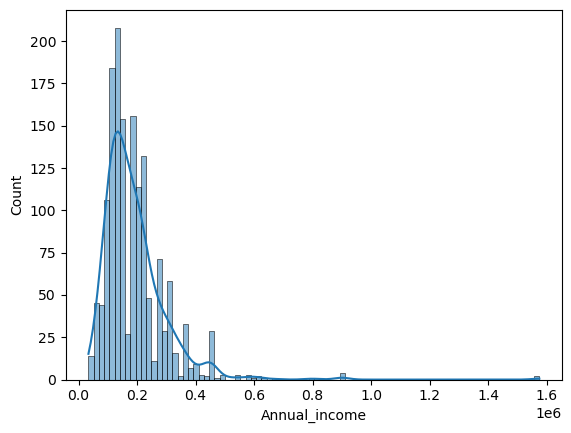

In [437]:
sns.histplot(x=data["Annual_income"], kde=True)

<AxesSubplot:ylabel='Annual_income'>

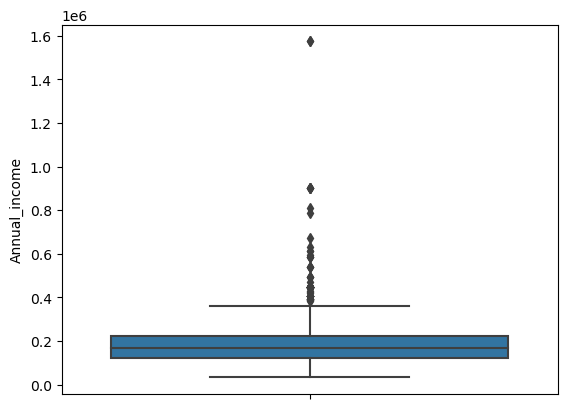

In [438]:
sns.boxplot(y=data["Annual_income"])

Annual Income has outliers, so imputing null values with median of Annual_income feature

In [439]:
data["Annual_income"].median()

166500.0

In [440]:
data["Annual_income"] = data["Annual_income"].fillna(data["Annual_income"].median())

In [441]:
data["GENDER"].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

Gender feature has more female(63%) frequency compared to males(37%), so imputing missing values with mode of GENDER feature 

In [442]:
data["GENDER"] = data["GENDER"].fillna(data["GENDER"].mode()[0])

Feature "Birthday_count" has values in days. We need to convert into years for creating new column "Age", so that it will be easy for our analysis

In [443]:
import datetime
# Using to_timedelta function from pandas to subtract days from current datetime and get the birthdate in datetime format
NewDate = datetime.datetime.now() + pd.to_timedelta(data['Birthday_count'], unit='D')
NewDate = pd.to_datetime(NewDate)
NewDate

0      1972-09-06 17:38:19.994739
1      1986-12-17 17:38:19.994739
2                             NaT
3      1986-12-17 17:38:19.994739
4      1986-12-17 17:38:19.994739
                  ...            
1543   1991-05-05 17:38:19.994739
1544   1996-01-27 17:38:19.994739
1545   1988-01-04 17:38:19.994739
1546   1982-03-18 17:38:19.994739
1547   1978-08-17 17:38:19.994739
Name: Birthday_count, Length: 1548, dtype: datetime64[ns]

In [444]:
# Creating new column "Age" from "Birthday_count" 
data['Age'] = (datetime.datetime.now() - NewDate).astype('<m8[Y]')
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,51.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,NaN
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,37.0


<AxesSubplot:ylabel='Age'>

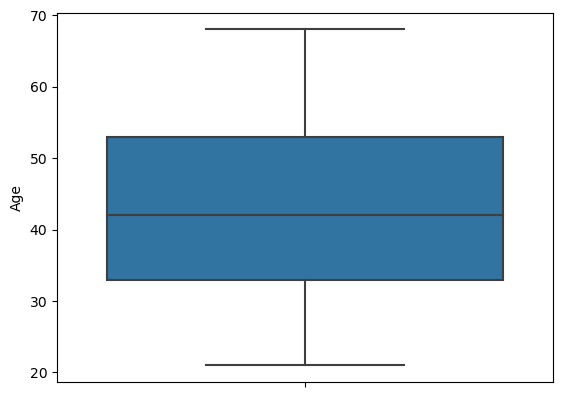

In [445]:
sns.boxplot(y=data["Age"])

There are no outliers in the newly created column "Age". Hence using mean of Age to impute the missing values.

In [446]:
round(data["Age"].mean(), 2)

43.42

In [447]:
data["Age"] = data["Age"].fillna(round(data["Age"].mean(), 2))

# Extracting Employed_years(in years) feature from Employed_days feature as Employed_days have values in days

In [448]:
data['Employed_days'].value_counts()

 365243    261
-586         6
-622         5
-460         5
-1678        5
          ... 
-3034        1
-1324        1
-3112        1
-2959        1
-2859        1
Name: Employed_days, Length: 956, dtype: int64

As seen from the value counts of Employed_days above, there are 261 values of 365243 days. Here Employed_days > 0 implies unemployed. By replacing the days > 0 to 0, we can convert the Employed_days into new feature Employed_years.

In [449]:
data.loc[data['Employed_days']>0, 'Employed_days'] = 0

In [450]:
# Using to_timedelta function from pandas to subtract days from current datetime and get the employed date in datetime format
empDate = datetime.datetime.now() + pd.to_timedelta(data['Employed_days'], unit='D')
empDate = pd.to_datetime(empDate)
empDate

0      2024-01-29 17:38:20.281446
1      2022-06-22 17:38:20.281446
2      2022-06-22 17:38:20.281446
3      2022-06-22 17:38:20.281446
4      2022-06-22 17:38:20.281446
                  ...            
1543   2018-02-07 17:38:20.281446
1544   2020-10-07 17:38:20.281446
1545   2017-04-18 17:38:20.281446
1546   2022-04-24 17:38:20.281446
1547   2016-04-01 17:38:20.281446
Name: Employed_days, Length: 1548, dtype: datetime64[ns]

In [451]:
data["Employed_years"] = (datetime.datetime.now() - empDate).astype('<m8[Y]')
data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Employed_years
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,0,1,0,0,0,NaN,2,1,51.00,0.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.00,1.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,43.42,1.0
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.00,1.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.00,1.0


Since we created new features "Age" and "Employed_years" from "Birthday_count" and "Employed_days", we will drop the old features, as that data is redundant.

In [452]:
data.drop(columns=["Birthday_count", "Employed_days"],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1548 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1548 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Mobile_phone     1548 non-null   int64  
 11  Work_Phone       1548 non-null   int64  
 12  Phone            1548 non-null   int64  
 13  EMAIL_ID         1548 non-null   int64  
 14  Type_Occupation  1060 non-null   object 
 15  Family_Members   1548 non-null   int64  
 16  label            1548 non-null   int64  
 17  Age           

For improved readability, we will rename certain columns in the dataset.

In [453]:
data = data.rename(columns = {"GENDER":"Gender", 
                              "Car_Owner":"Has_car",
                              "Propert_Owner":"Has_property",
                              "CHILDREN":"Children_count",
                             "Type_Income":"Employment_status",
                             "EDUCATION":"Education",
                             "Mobile_phone":"Has_mobile",
                             "Work_Phone":"Has_work_phone",
                             "Phone":"Has_phone",
                             "EMAIL_ID":"Has_email_id",
                              "label":"Is_approved"
                             })

Currently our target variable(Is_approved) holds 0 as 'approved' and 1 as 'not approved'. We will change this to 1 as 'approved' and 0 as 'not approved' for improved clarity.

In [454]:
data["Is_approved"] = data["Is_approved"].apply(lambda x: 1 if x == 0 else 0)
data.head()

,Ind_ID,Gender,Has_car,Has_property,Children_count,Annual_income,Employment_status,Education,Marital_status,Housing_type,Has_mobile,Has_work_phone,Has_phone,Has_email_id,Type_Occupation,Family_Members,Is_approved,Age,Employed_years
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,0,51.00,0.0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,0,37.00,1.0
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,0,43.42,1.0
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,0,37.00,1.0
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,0,37.00,1.0


In [455]:
# Saving cleaned merged and cleaned dataset in a csv file
#data.to_csv("credit_mergedata_new.csv", index=False)

In [456]:
# Function to calculate count and Frequency of each class in a feature
def val_cnt_freq(df, col):
    """Returns count and frequency of each class in a feature"""
    col_cnt = df[col].value_counts()
    col_cnt_norm = df[col].value_counts(normalize=True) * 100
    col_cnt_norm_concat = pd.concat([col_cnt, col_cnt_norm], axis=1)
    col_cnt_norm_concat.columns=['count', 'frequency(%)']
    return col_cnt_norm_concat

In [457]:
# Function to print, data type, statistical information, value counts and frequency of a feature
def gen_info_col(df, col):
    """Prints General information about a feature"""
    print('Description:\n{}'.format(df[col].describe()))
    print('*'*50)
    print('Object type:\n{}'.format(df[col].dtype))
    print('*'*50)
    val_cnt = val_cnt_freq(df, col)
    print('Value count:\n{}'.format(val_cnt))

In [458]:
# Function to create a pie chart for categorical features
def pie_plot(df, col):
    """Plots a pie chart"""
    ratio_size = val_cnt_freq(df, col)
    ratio_size_len = len(ratio_size.index)
    ratio_list = []
    for i in range(ratio_size_len):
        ratio_list.append(ratio_size.iloc[i]['frequency(%)'])
#     fig, ax = plt.subplots(figsize=(8,8))
    plt.figure(figsize=(15,7))
    plt.pie(ratio_list, labels=ratio_size.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor' :'black'})
    plt.title('Pie chart of {}'.format(col))
    plt.legend(loc='lower right')
    plt.axis('equal')
    return plt.show()

In [459]:
# Function to create a bar plot for categorical features
def bar_plot(df, col):
    """Plots a bar plot"""
    plt.figure(figsize=(15,7))
    sns.barplot(x=val_cnt_freq(df,col).index,y=val_cnt_freq(df,col).values[:,0])
    plt.xlabel('{}'.format(col))
    plt.xticks(rotation=45,ha='right')
    plt.ylabel('Count')
    plt.title('{} count'.format(col))
    return plt.show()

In [460]:
# Function to create a box plot for continuous variables
def box_plot(df, col):
    """plots a box plot"""
    fig, ax = plt.subplots(figsize=(2,8))
    sns.boxplot(y=df[col])
    plt.title('{} distribution(Boxplot)'.format(col))
    return plt.show()

In [461]:
# Function to create a histogram for continuous variables
def hist_plot(df, col, the_bins=50):    
    """plots a histogram"""
    fig, ax = plt.subplots(figsize=(18,10))
    sns.histplot(df[col],bins=the_bins,kde=True)
    plt.title('{} distribution'.format(col))
    return plt.show()

In [462]:
# Function to create two box plots with respect to each class of target variable
def box_plot_target(df, col):   
    """Approved/Not approved applicants on a box plot"""
    print(df.groupby('Is_approved')[col].mean())
    fig, ax = plt.subplots(figsize=(5,8))
    sns.boxplot(y=df[col],x=df['Is_approved'])
    plt.title('Approved or not approved individuals grouped by {}'.format(col))
    return plt.show()

In [463]:
# Function to create bar plots with respect to each class of target variable
def bar_plot_target(df,col):
    """Approved/Not approved applicants on a bar plot"""
    is_approved = df.groupby(col)['Is_approved'].sum()
    is_approved_sort = is_approved.sort_values(ascending=False)
    print(dict(is_approved_sort))
    fig, ax = plt.subplots(figsize=(6,10))
    # plot on the X axis the indexes which correspond to classes, and on the Y axis, the count
    sns.barplot(x=is_approved_sort.index,y=is_approved_sort.values)
    # add the labels to the plot
    ax.set_xticklabels(labels=is_approved_sort.index,rotation=45, ha='right')
    plt.ylabel('Count')
    plt.title('Approved applicants count grouped by {}'.format(col))
    return plt.show()

# Univariate Analysis

using gen_info_col function, printing general information, value counts and frequency of each feature

In [464]:
data.columns[data.columns != 'Ind_ID']

Index(['Gender', 'Has_car', 'Has_property', 'Children_count', 'Annual_income',
       'Employment_status', 'Education', 'Marital_status', 'Housing_type',
       'Has_mobile', 'Has_work_phone', 'Has_phone', 'Has_email_id',
       'Type_Occupation', 'Family_Members', 'Is_approved', 'Age',
       'Employed_years'],
      dtype='object')

In [465]:
for col in data.columns[data.columns != 'Ind_ID']:
    print("\033[91m",col,"\033[0m")
    gen_info_col(data, col)
    print("-"*50)

 Gender 
Description:
count     1548
unique       2
top          F
freq       980
Name: Gender, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   count  frequency(%)
F    980     63.307494
M    568     36.692506
--------------------------------------------------
 Has_car 
Description:
count     1548
unique       2
top          N
freq       924
Name: Has_car, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   count  frequency(%)
N    924     59.689922
Y    624     40.310078
--------------------------------------------------
 Has_property 
Description:
count     1548
unique       2
top          Y
freq      1010
Name: Has_property, dtype: object
**************************************************
Object type:
object
**************************************************
Value count:
   count  f

calling bar_plot function and pie_plot function of categorical feature Gender for analysis

# Univariate Analysis for categorical features

In [466]:
catvar = ["Gender", "Has_car", "Has_property", "Employment_status", "Education", "Marital_status", "Housing_type", "Has_mobile", "Has_work_phone", "Has_phone", "Has_email_id", "Type_Occupation", "Is_approved"]


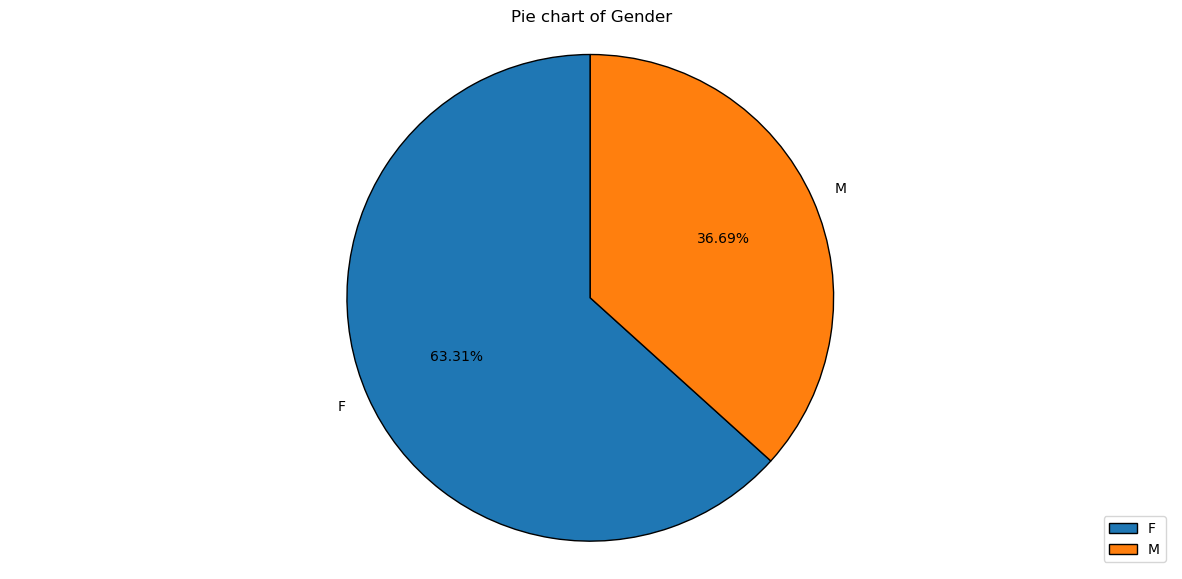

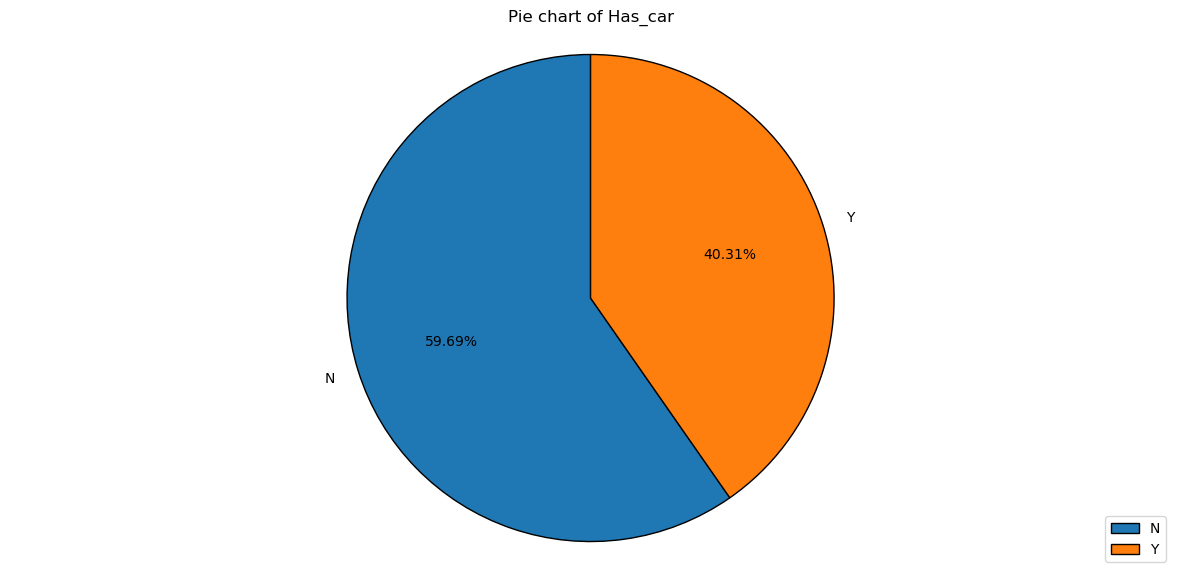

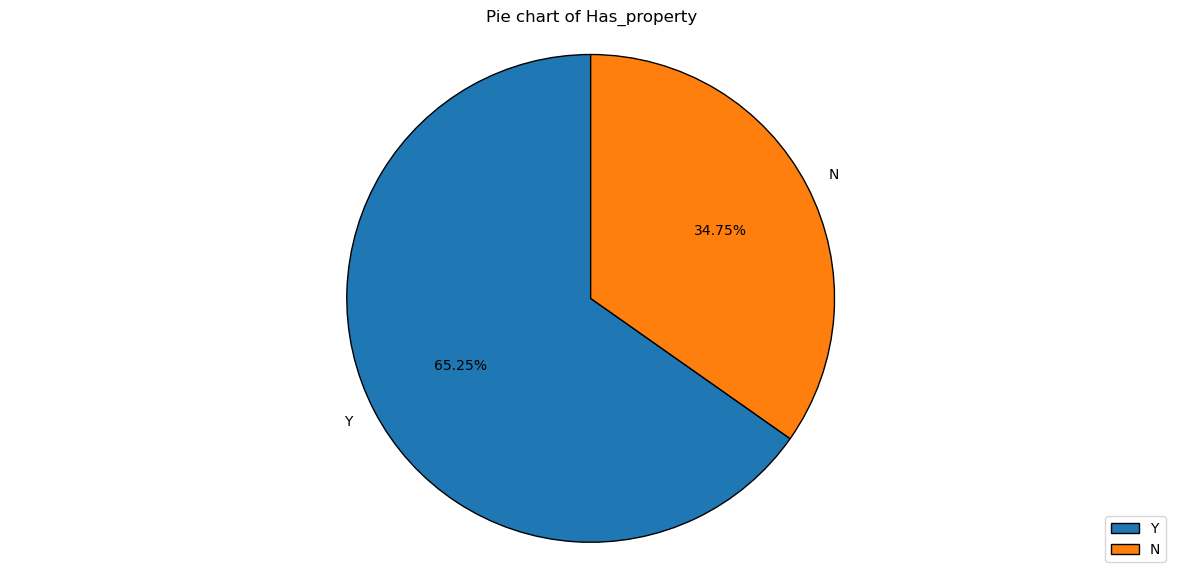

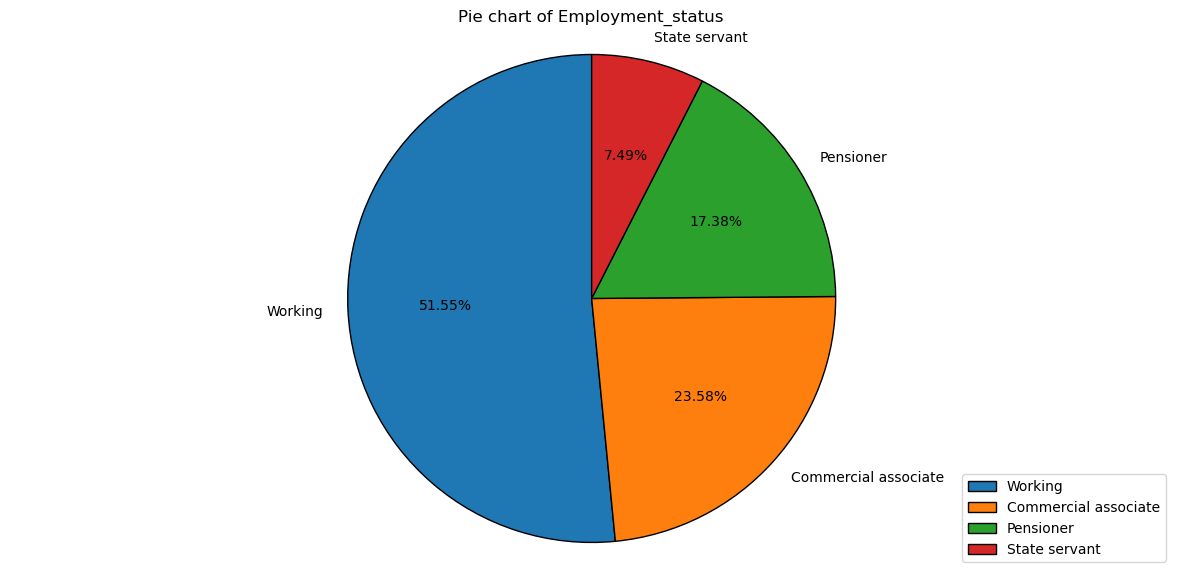

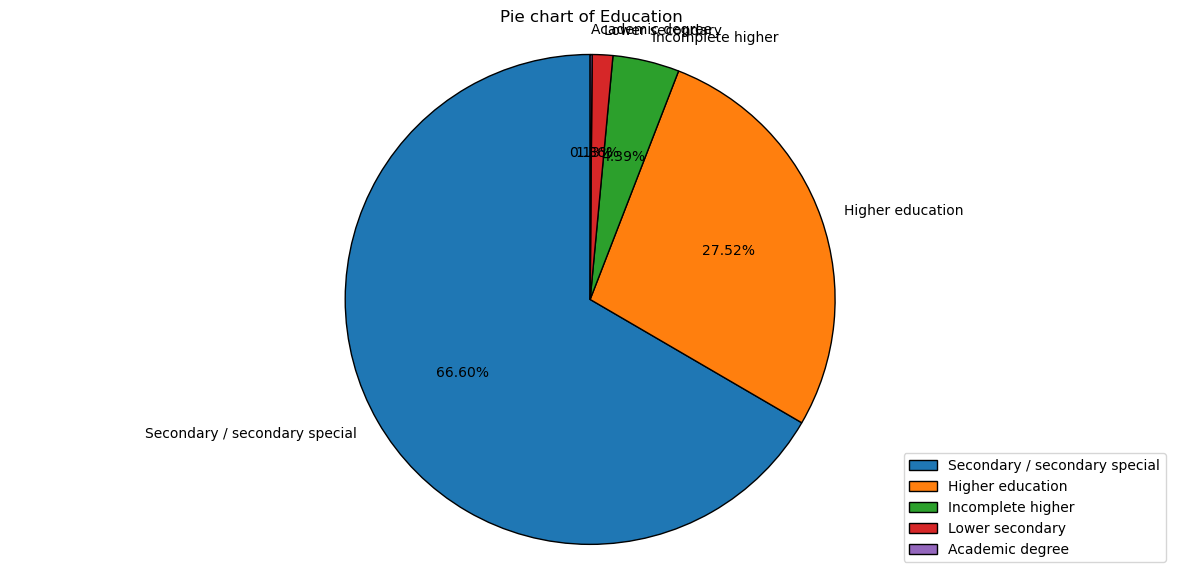

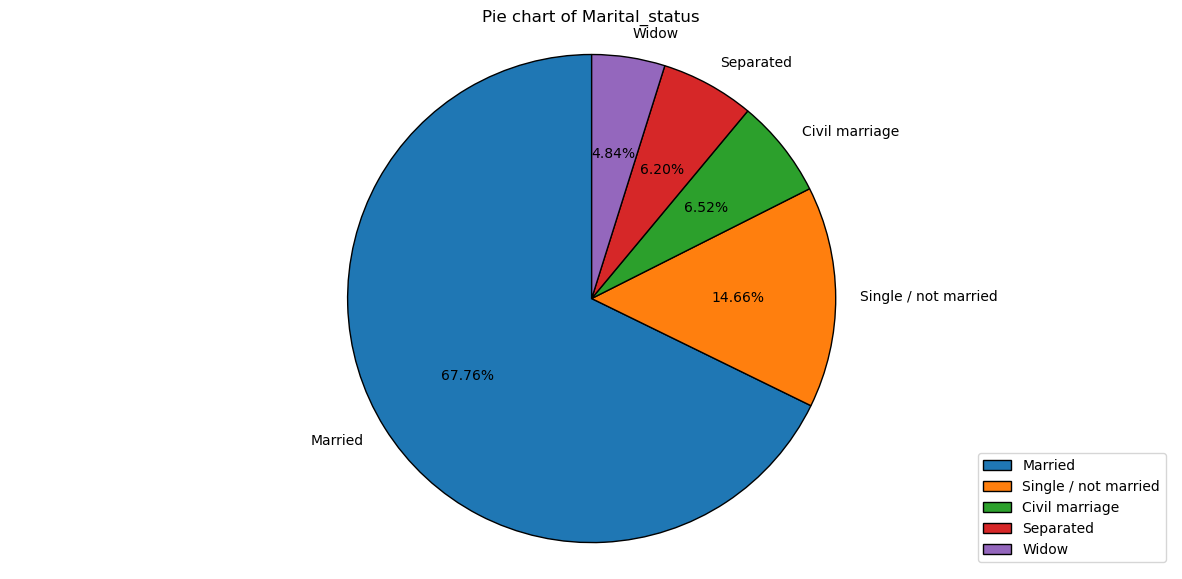

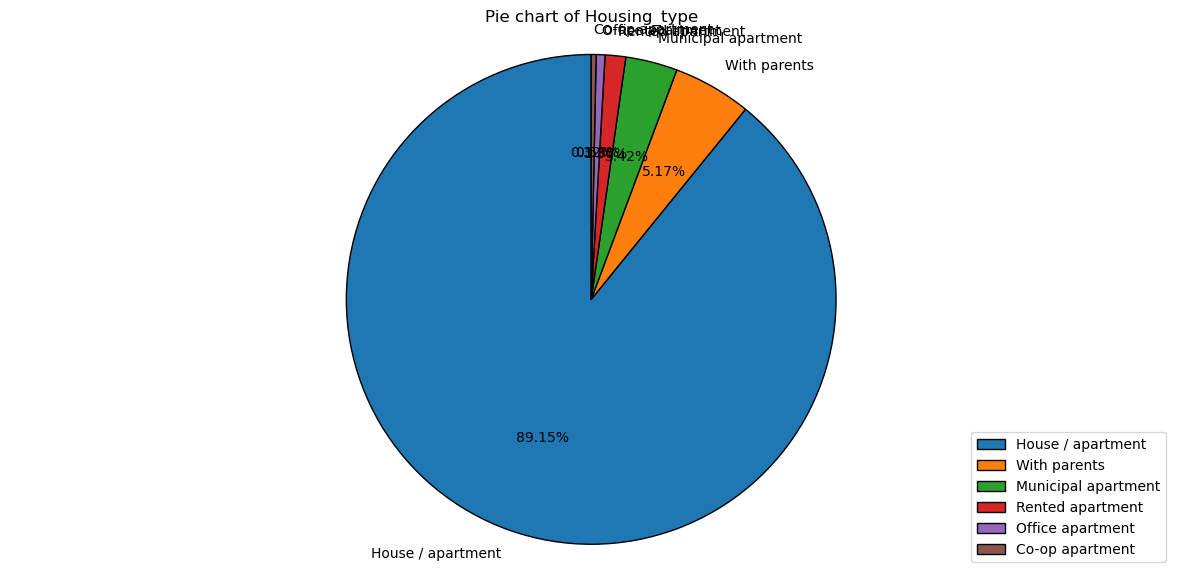

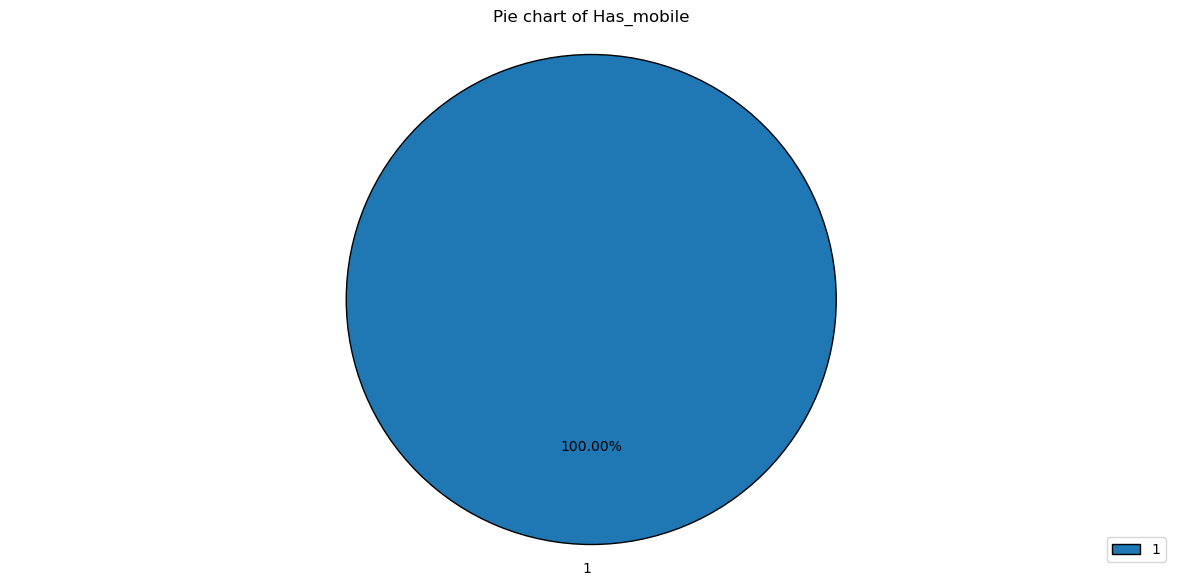

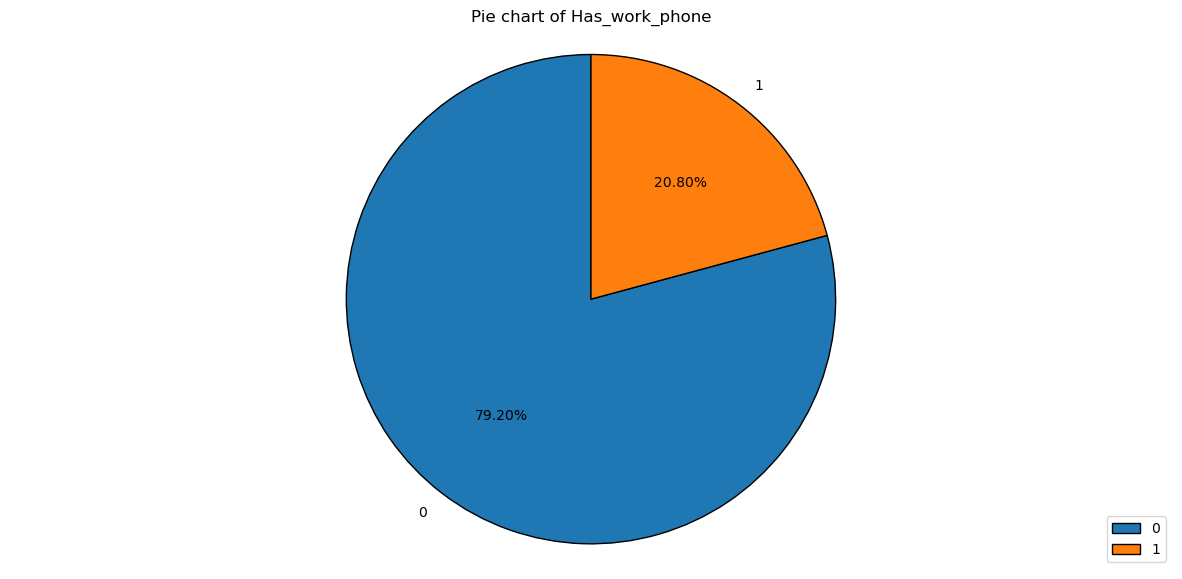

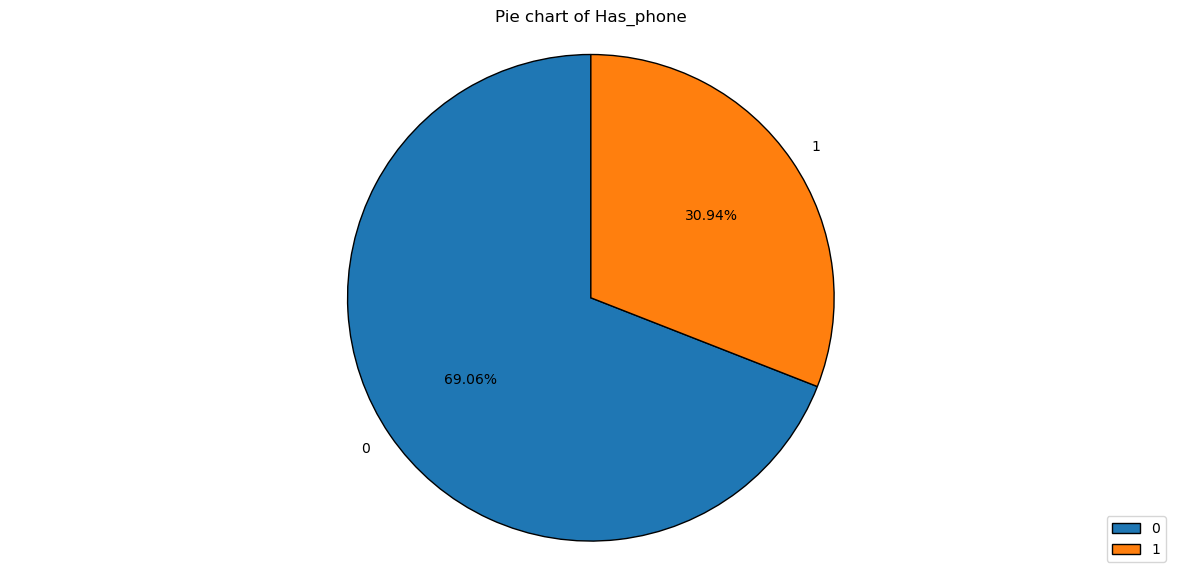

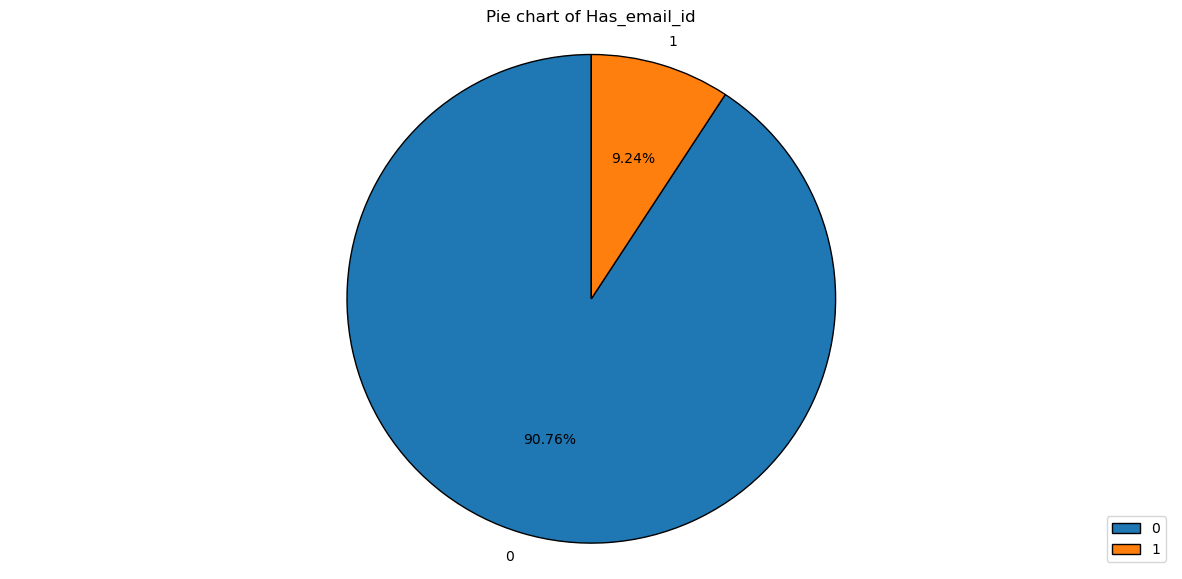

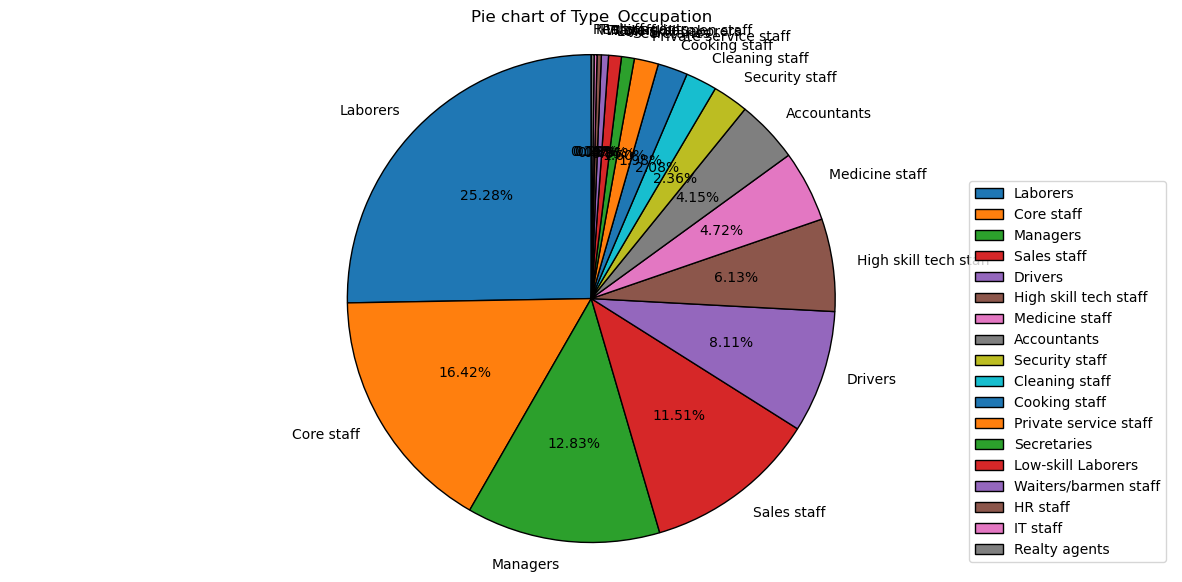

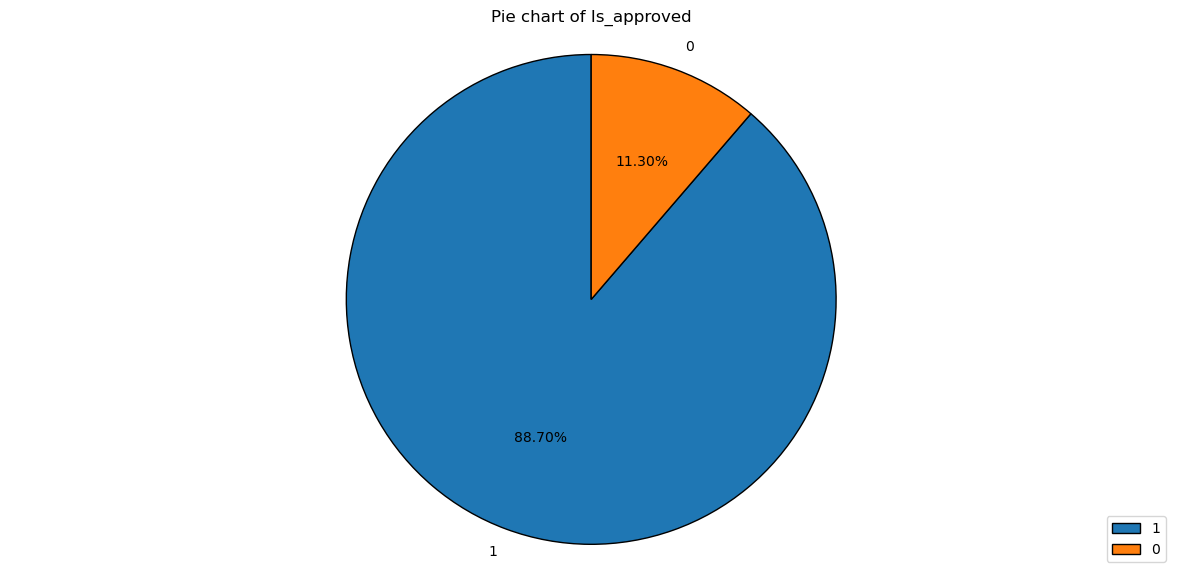

In [467]:
for cat in catvar:
    pie_plot(data, cat)

In [468]:
missing_data_pct = (data["Type_Occupation"].isnull().sum()/data["Type_Occupation"].shape[0])*100
missing_data_pct

31.52454780361757

Observations from above pie plots and bar plots for categorical features:

Gender feature has 63.31% Females and 36.69% of Males.
Marital_status feature consists of "Married" as major portion.
Most of the applicants have Secondary / secondary special as Education.
51.55% applicants are working as Employment_status feature.
89.15% applicants have House/apartment as Housing_type.

60% of  applicants dont own a car.
65.25% of applicants own property.
Everyone has mobile(1 means Yes).
79.2% dont have work phone(0 means No and 1 means Yes).
69.06% dont have phone(0 means No and 1 means Yes).
90% of applicants dont have email id(0 means No and 1 means Yes).

Target variable(Is_approved):
Most of the applicants(88.7%) are approved for credit card.

Type_Occupation doesn't have clear major category, though popular category is 'Laborers'. 31.52% of data is missing in this feature.



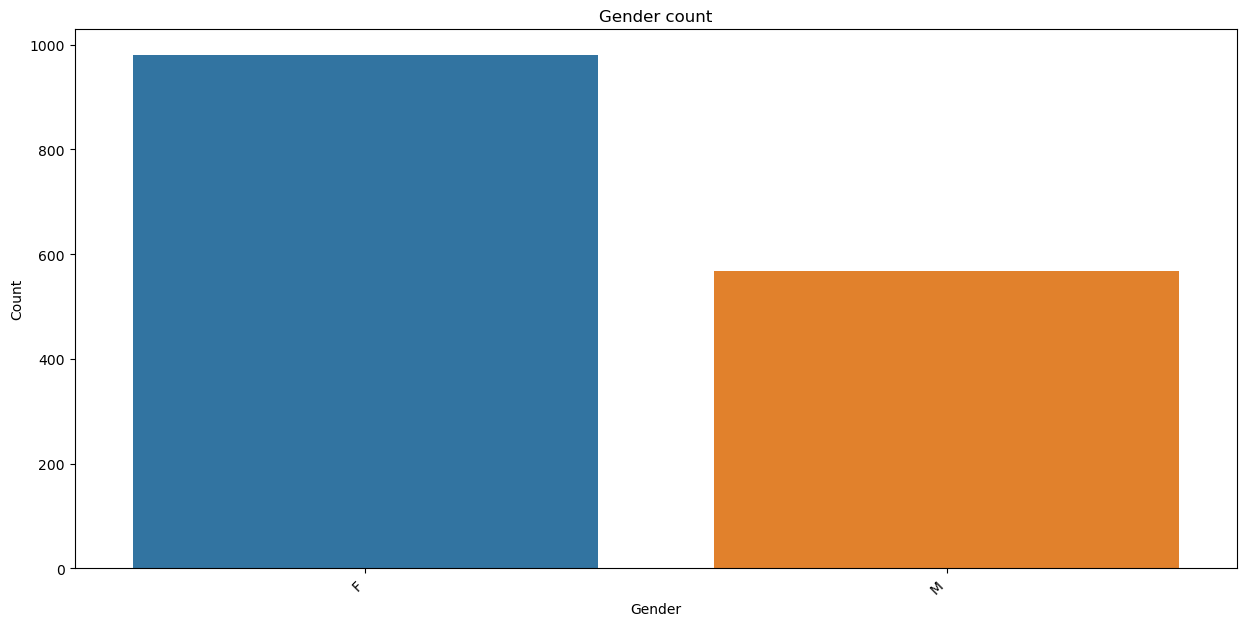

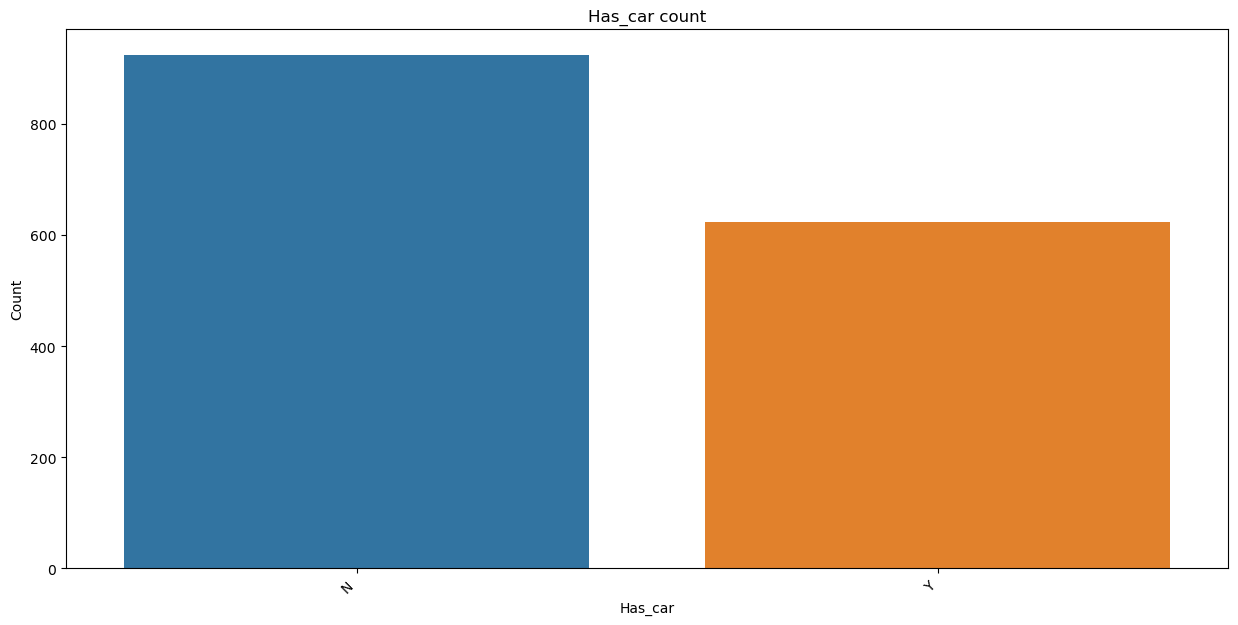

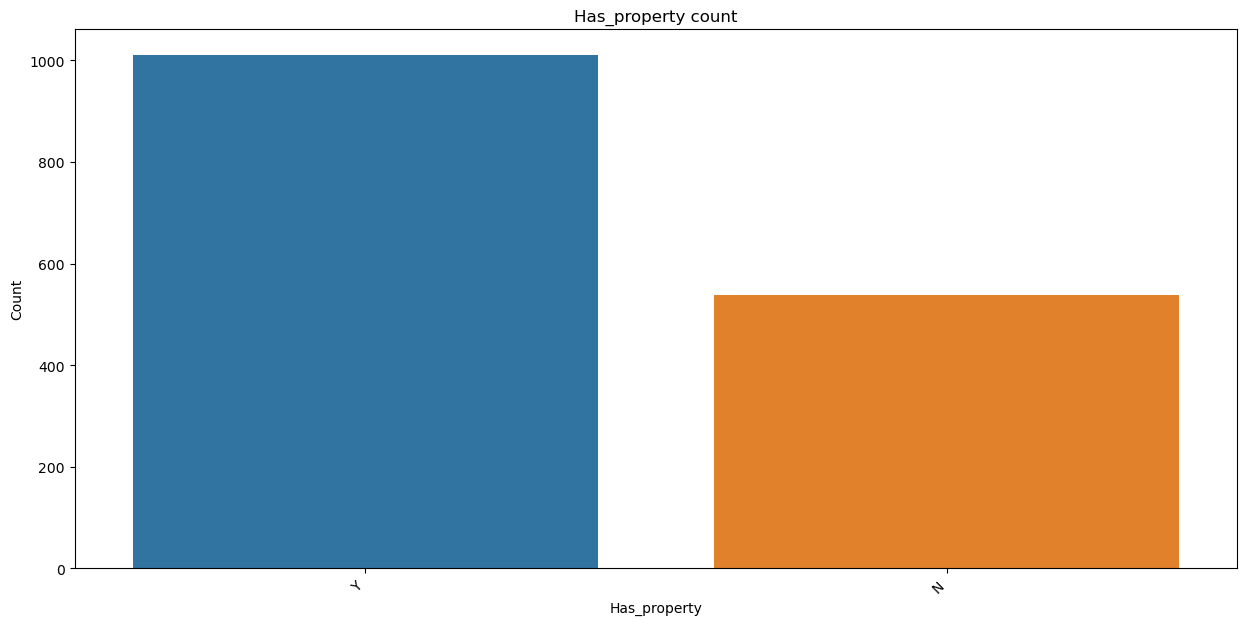

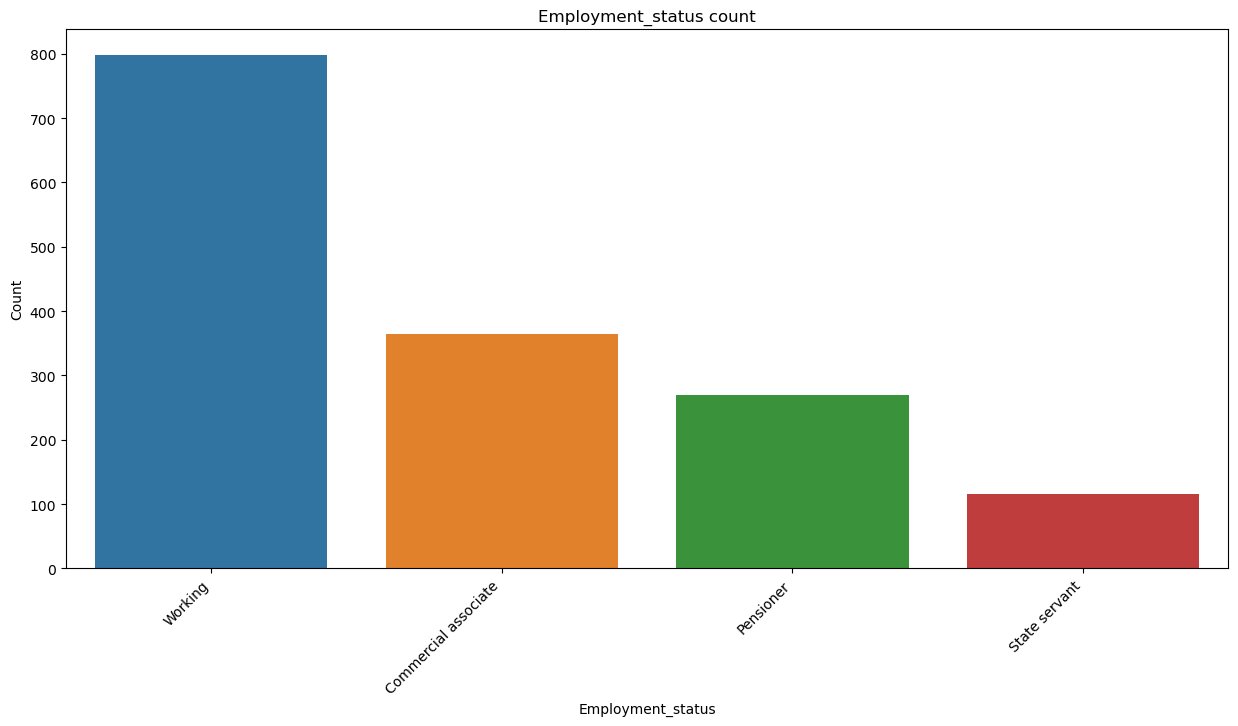

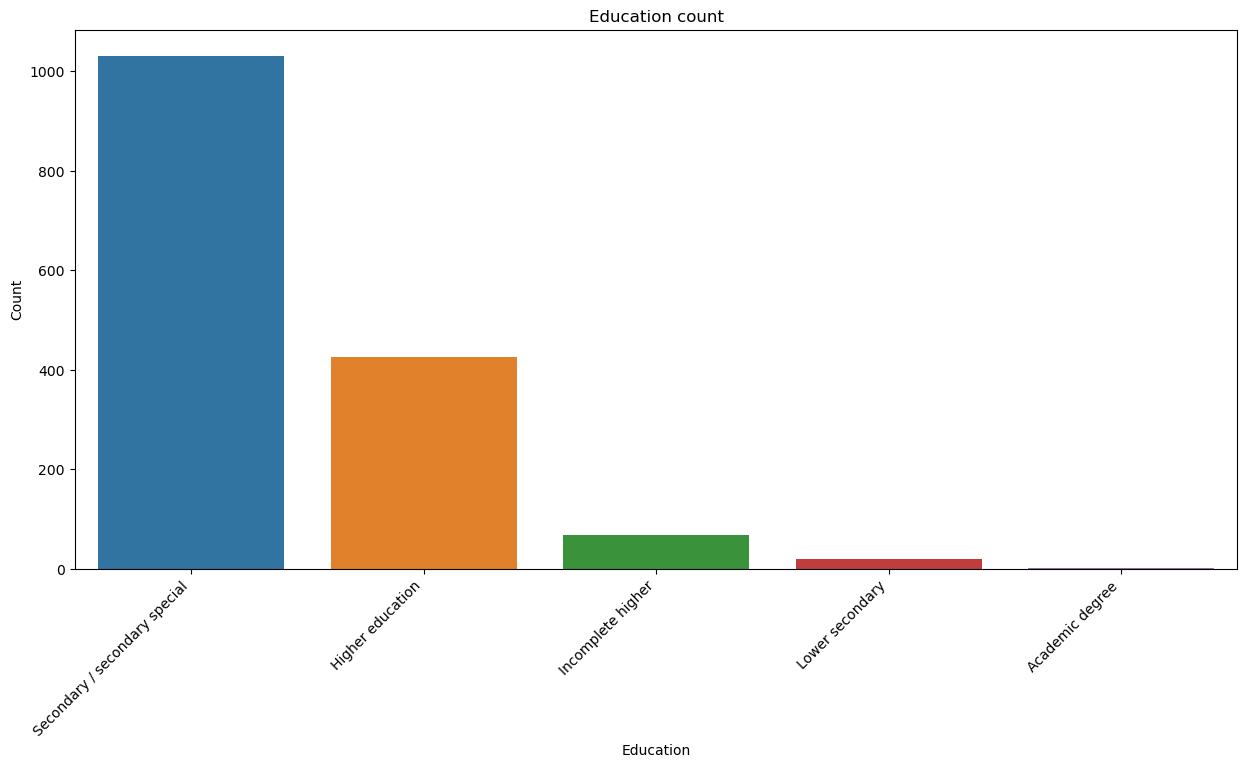

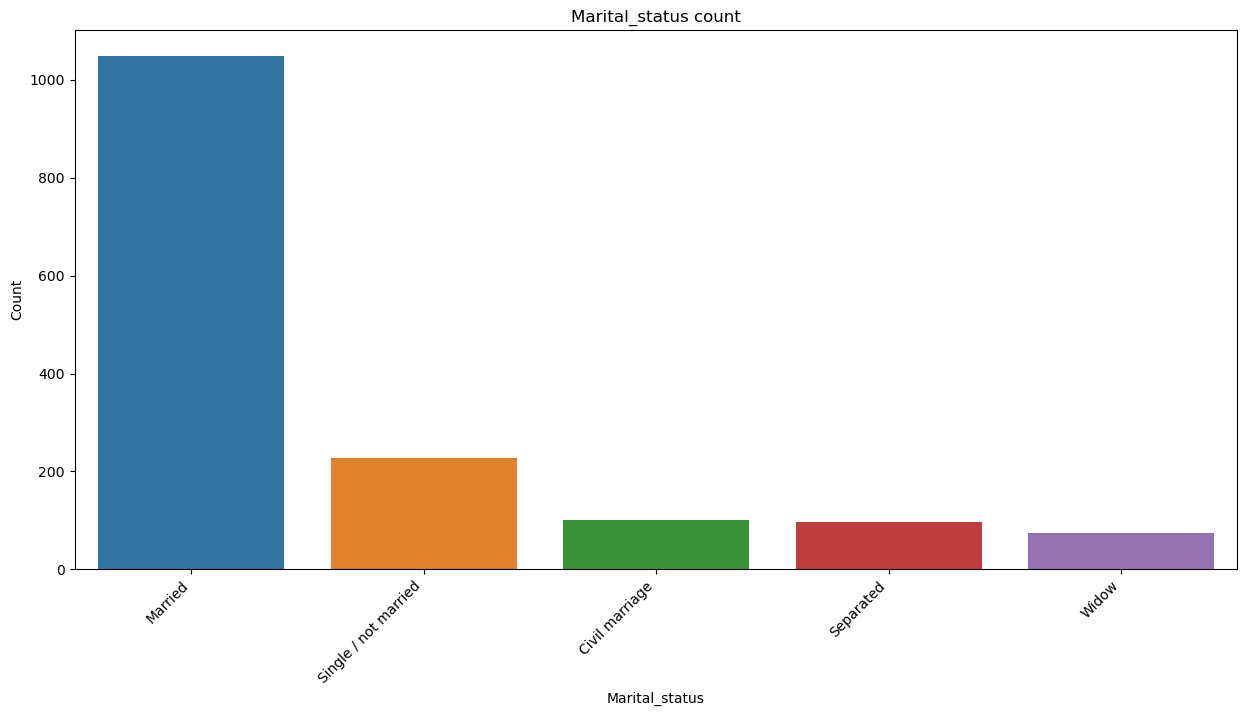

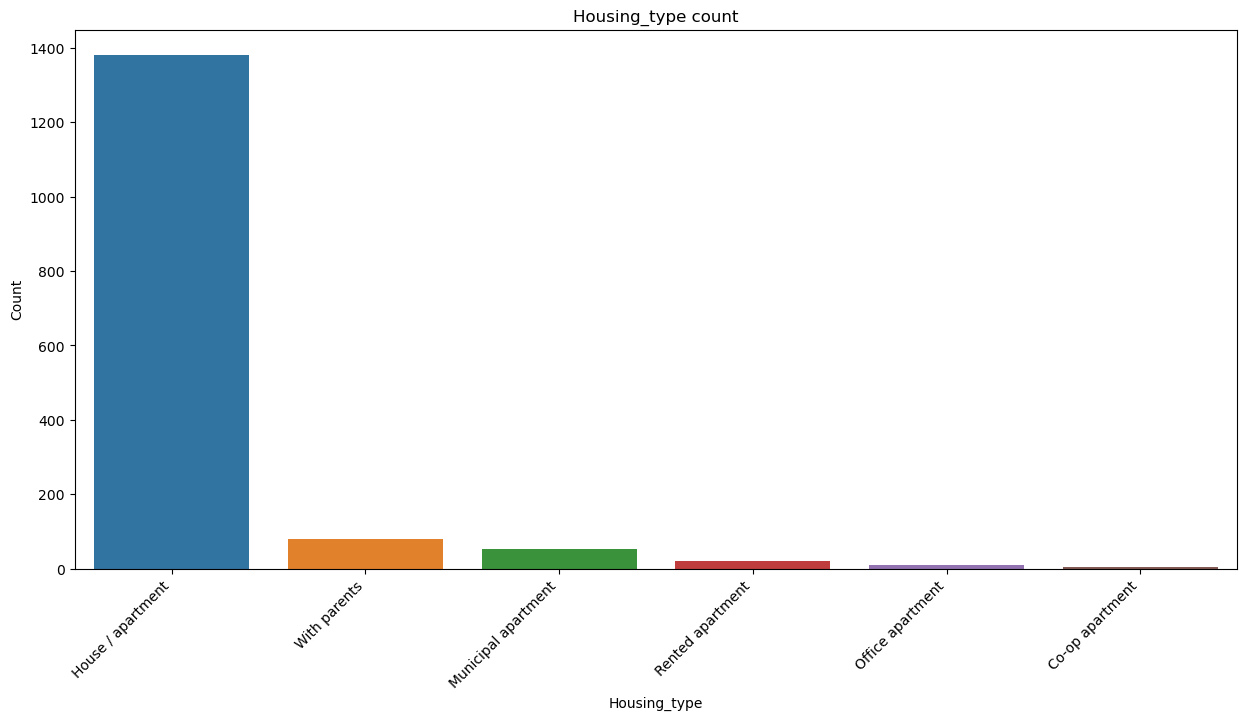

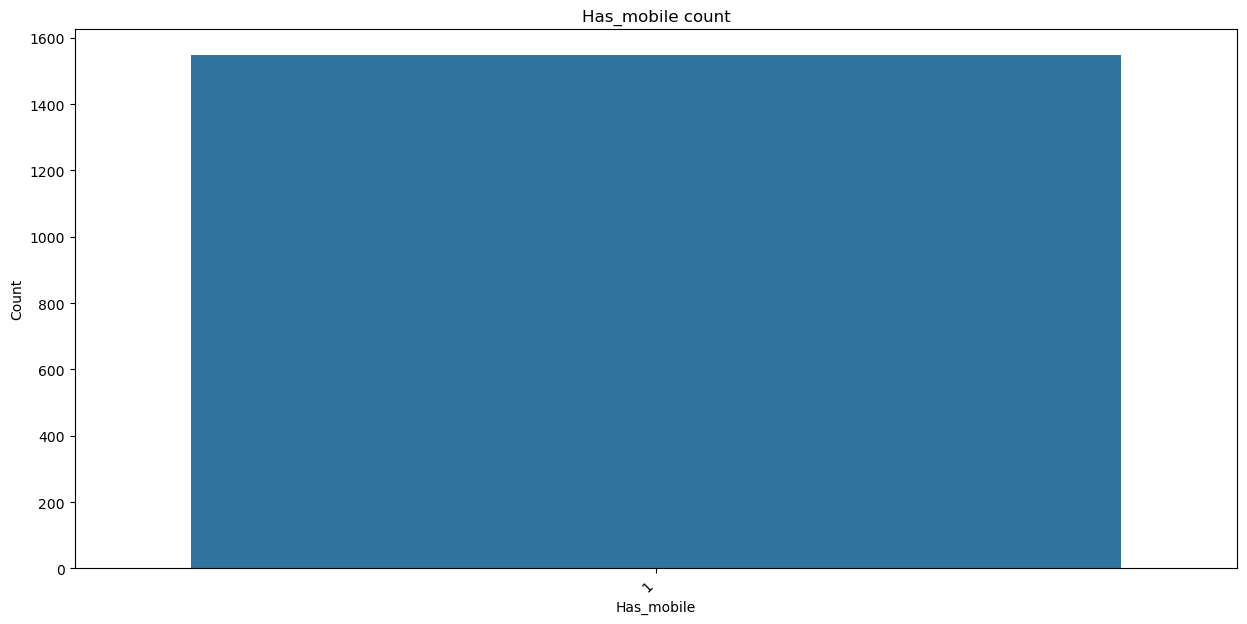

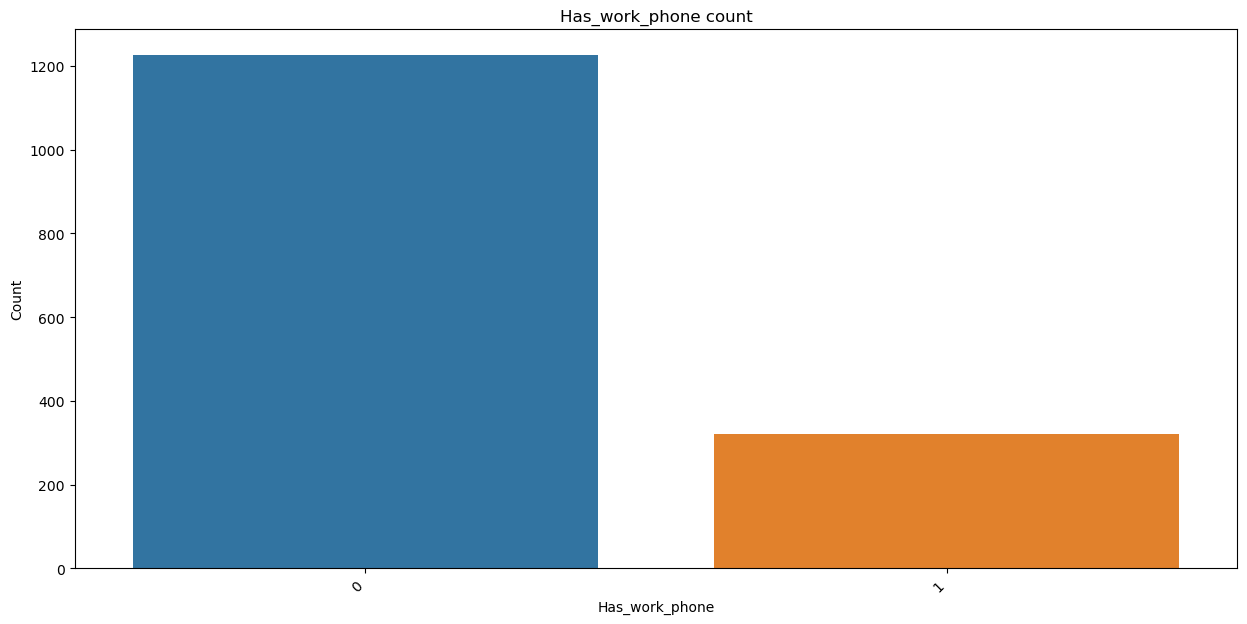

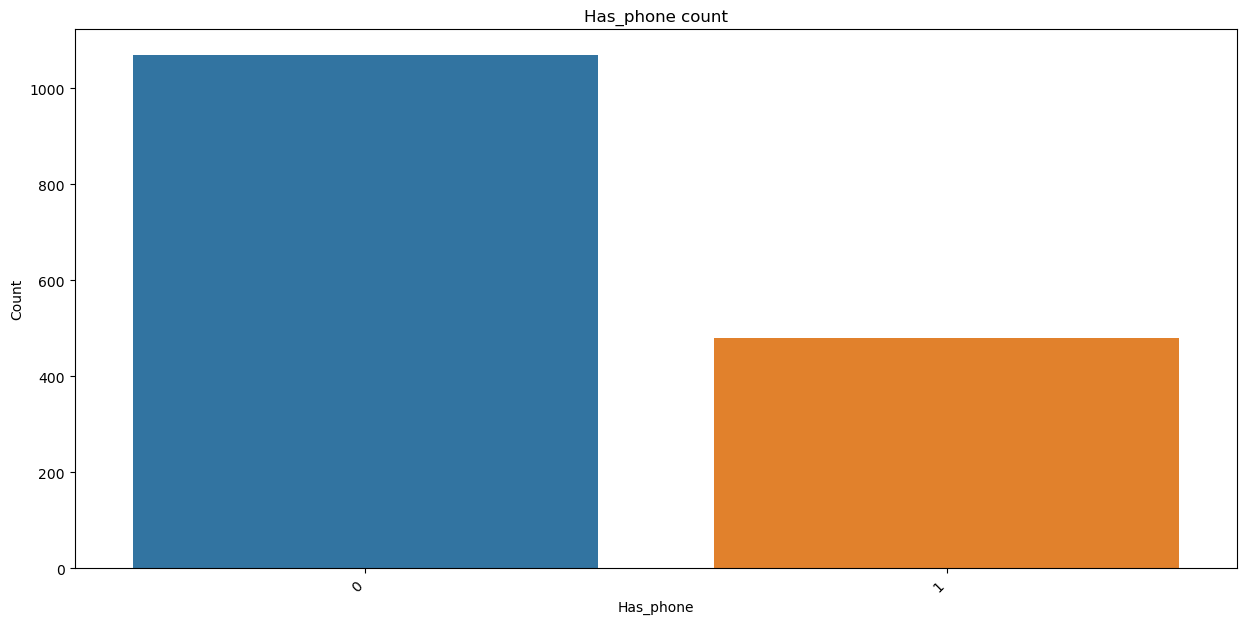

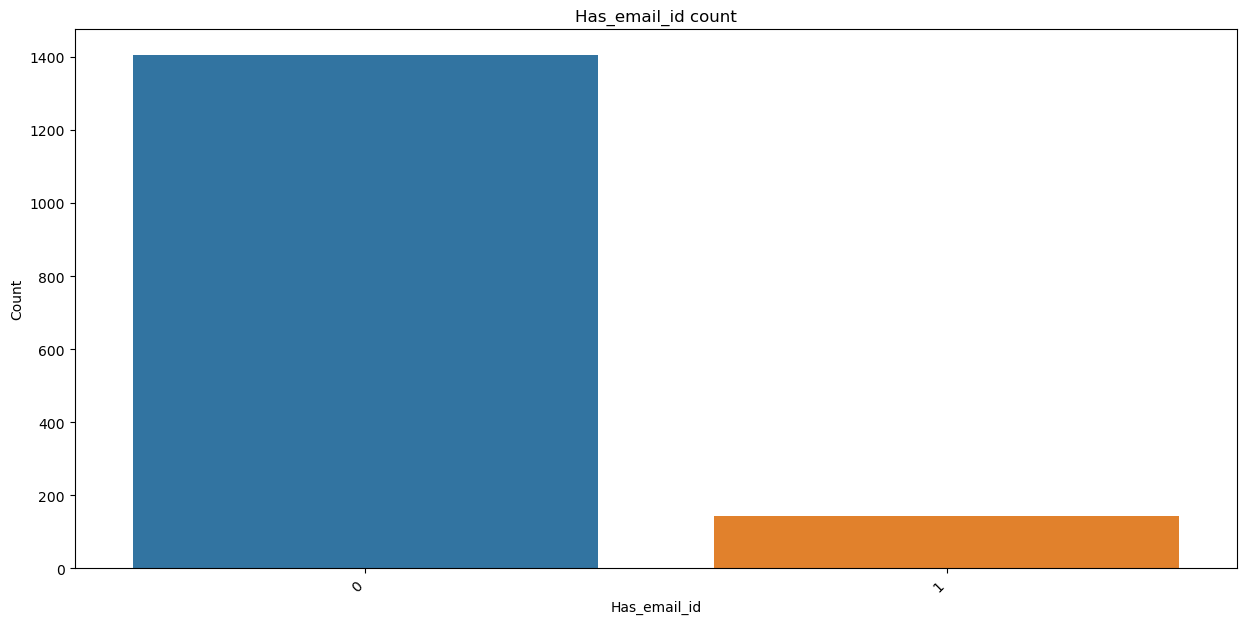

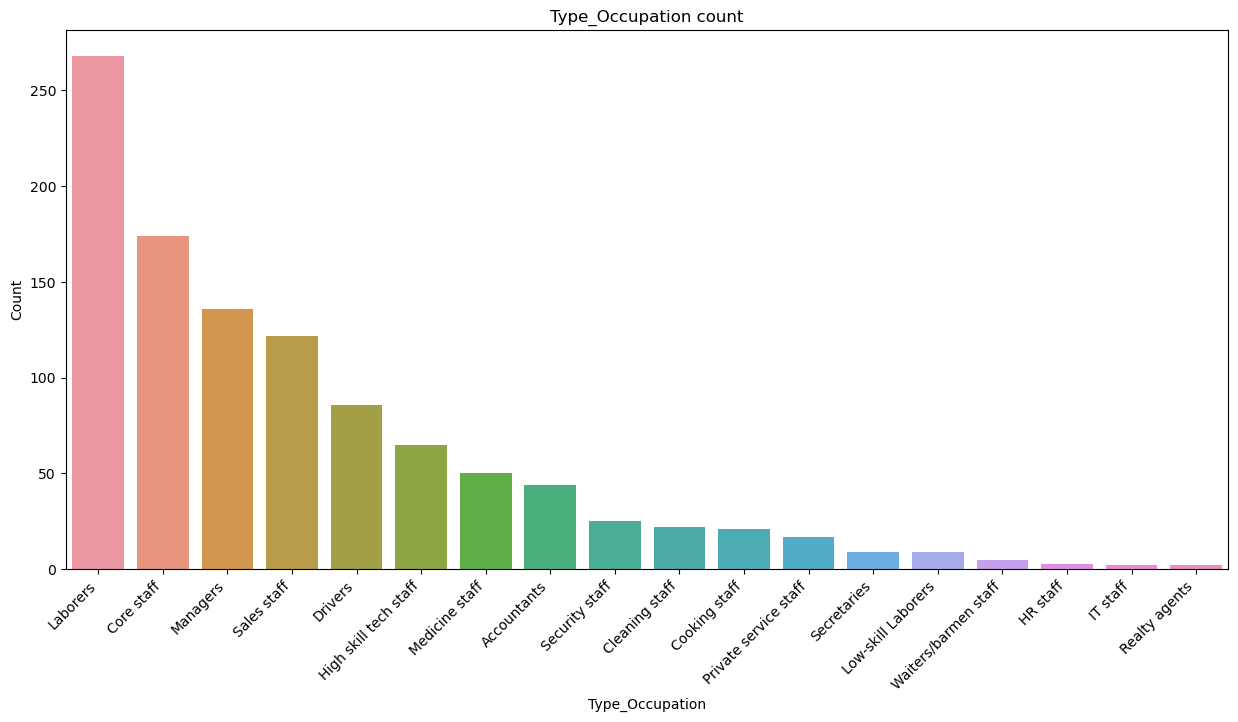

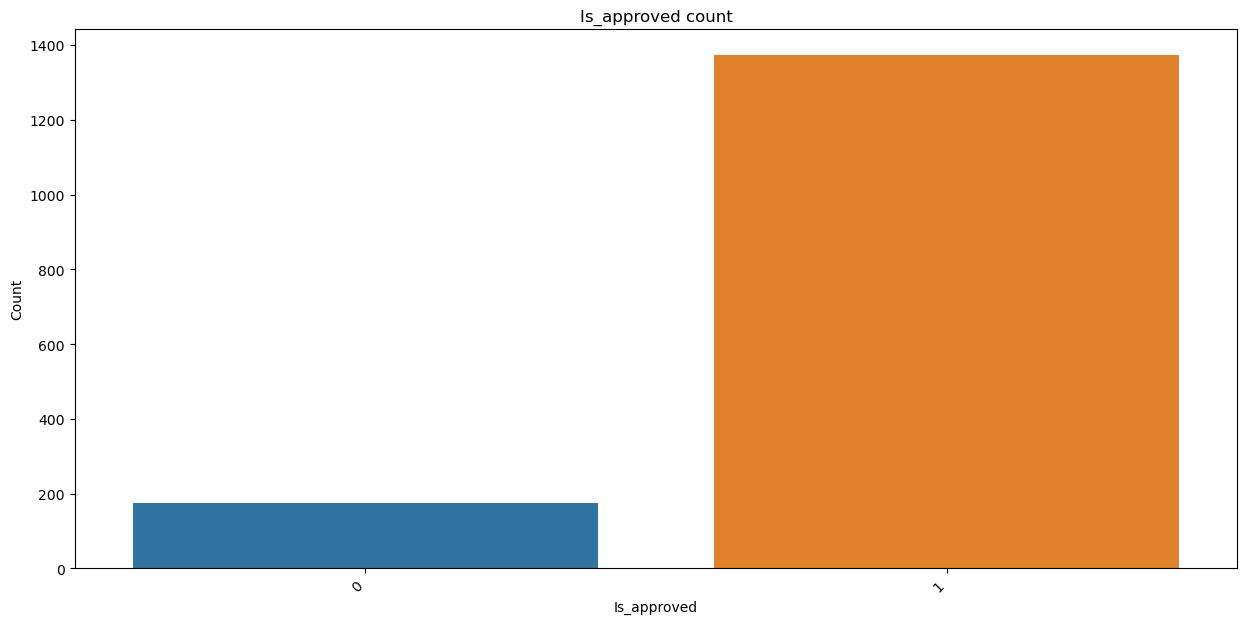

In [469]:
for cat in catvar:
    bar_plot(data, cat)

# Univariate Analysis for numerical features

In [470]:
numvar = ["Annual_income", "Children_count", "Family_Members", "Age", "Employed_years"]

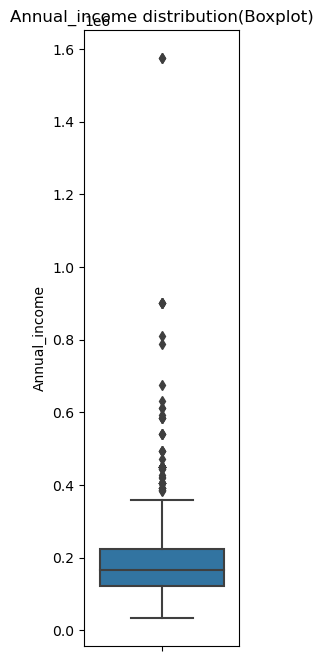

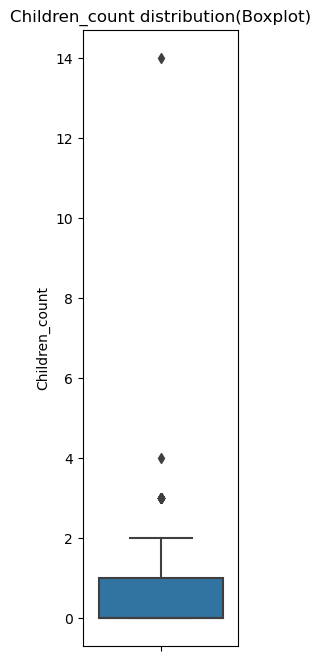

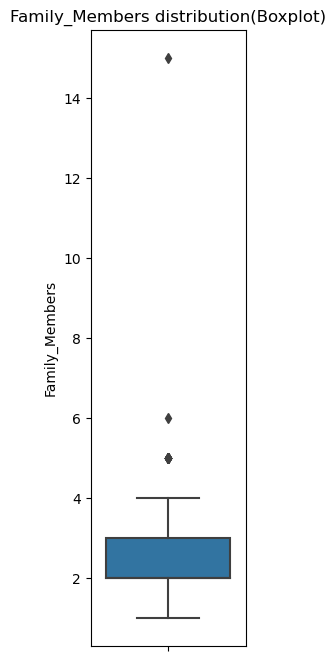

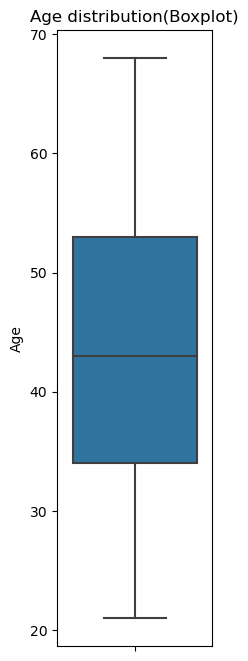

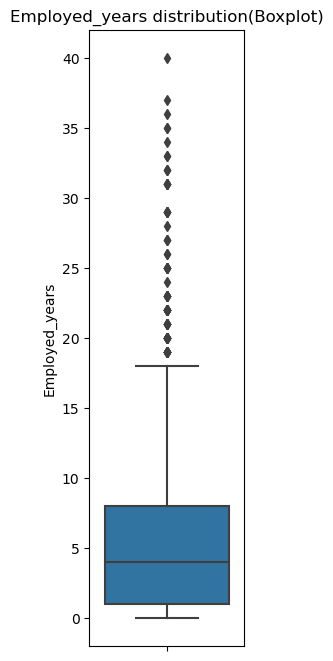

In [471]:
for num in numvar:
    box_plot(data, num)

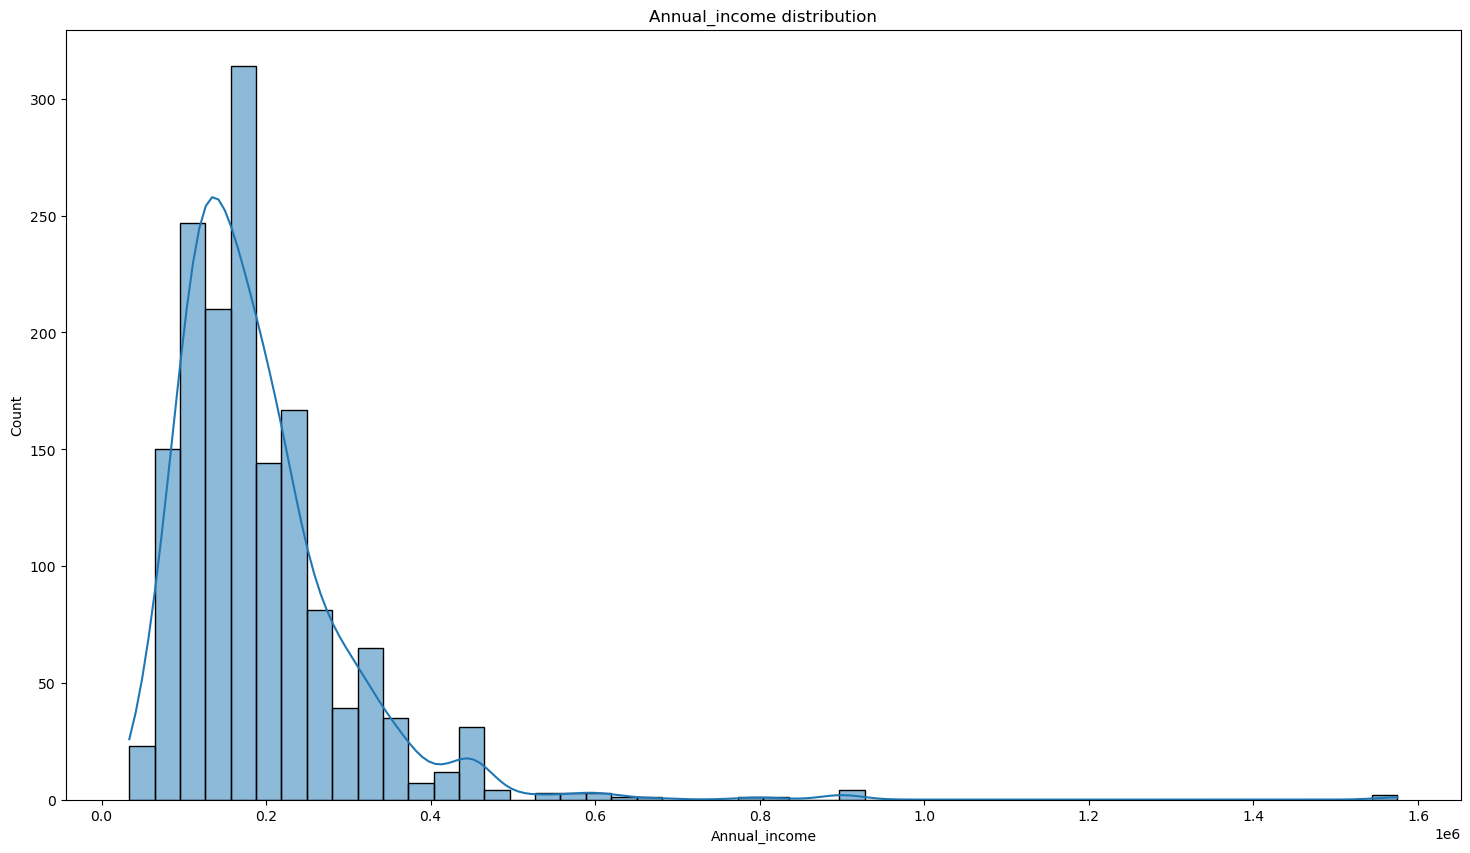

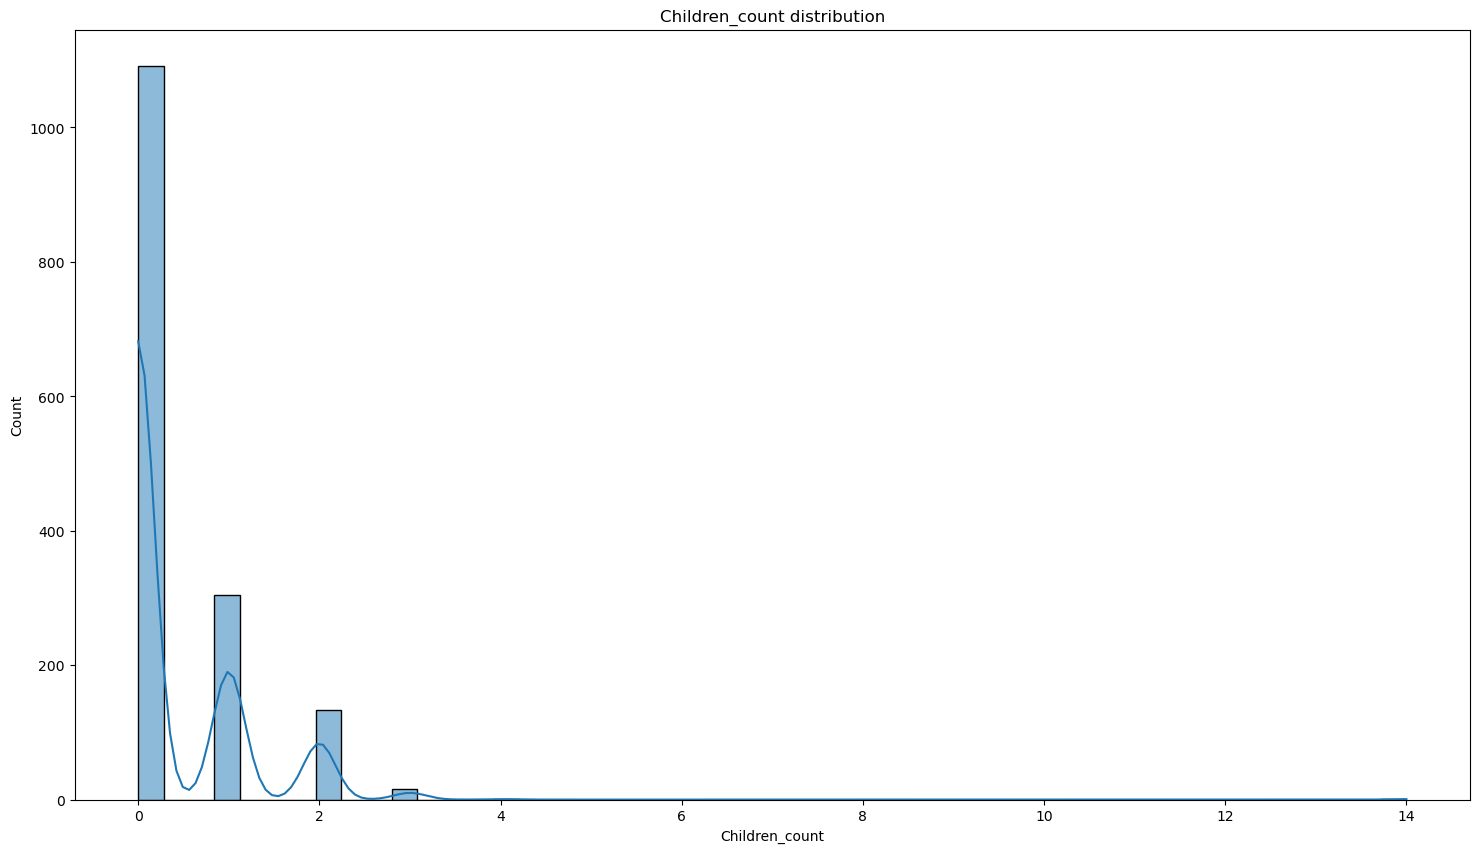

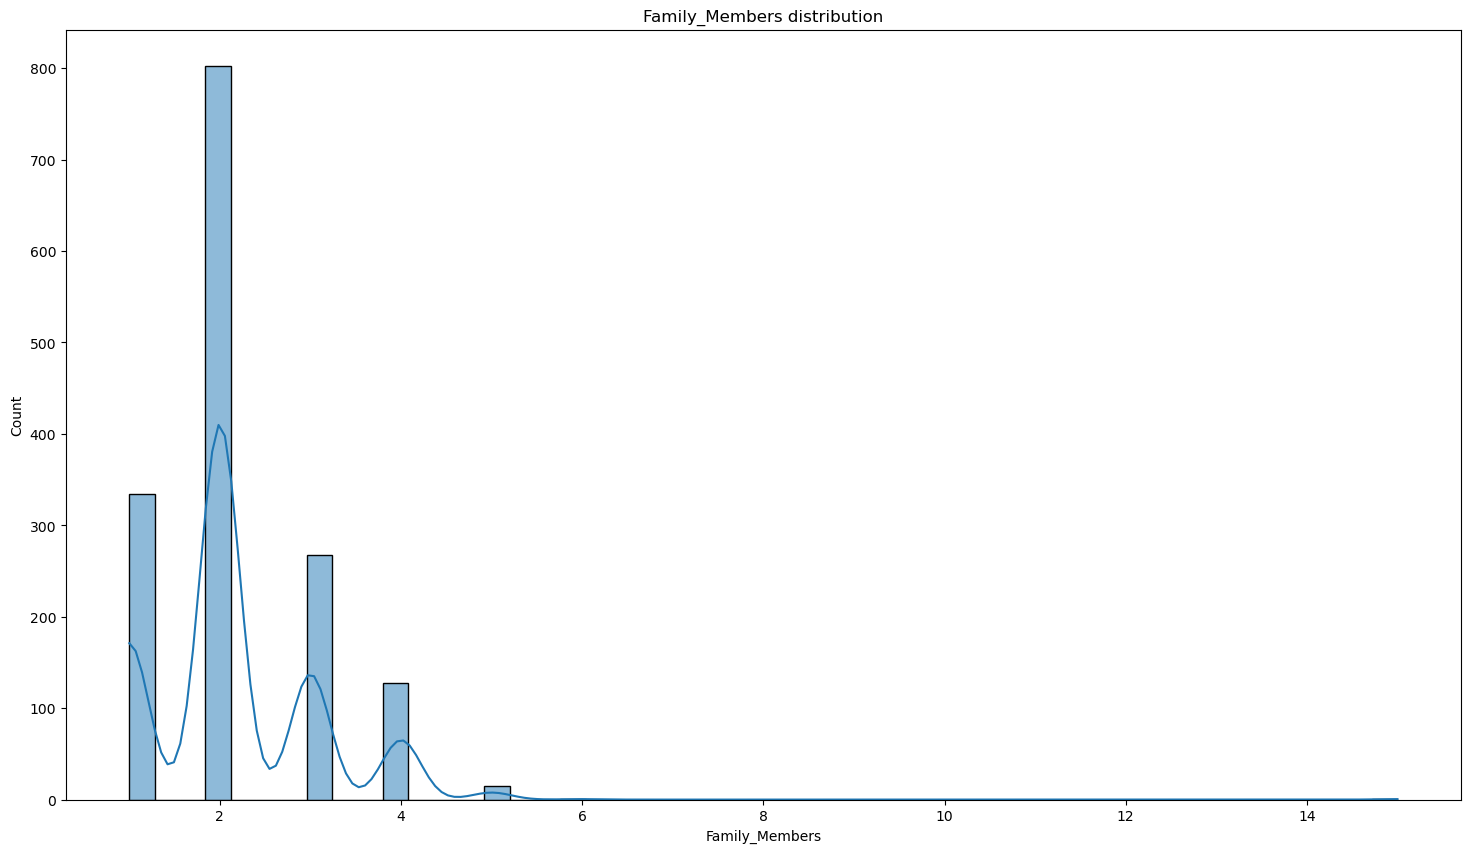

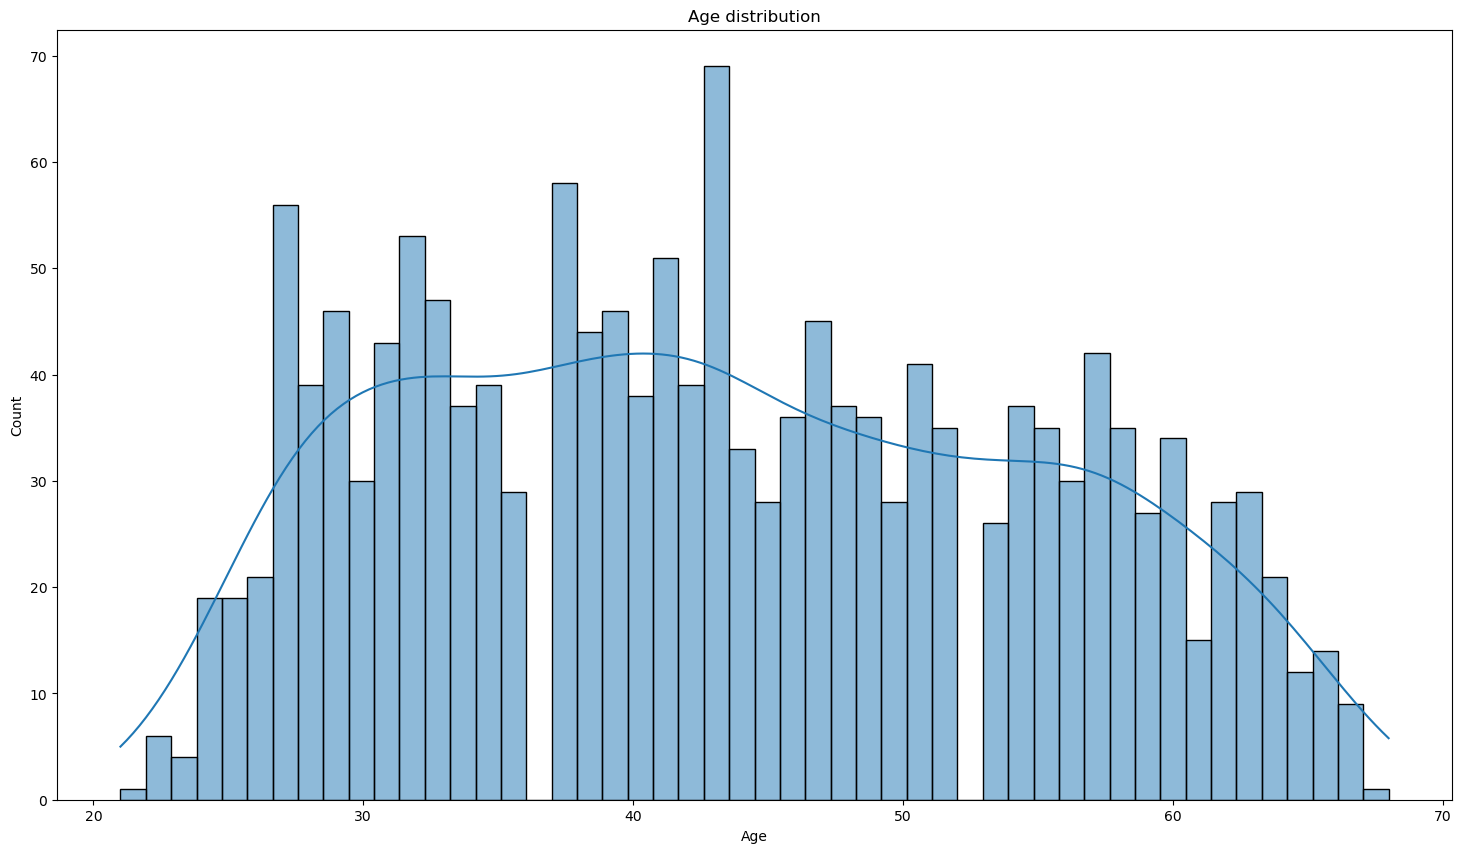

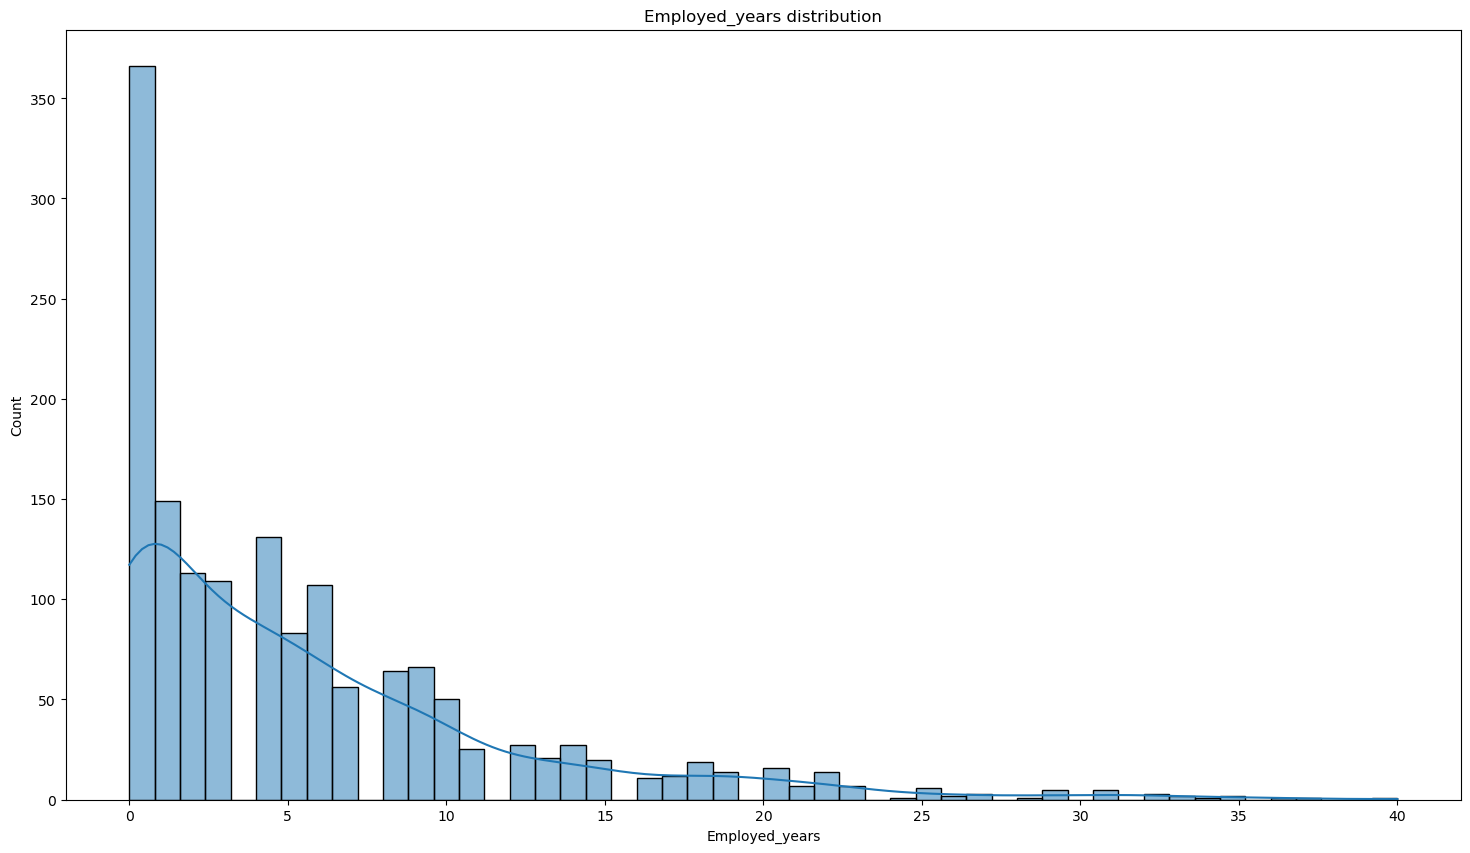

In [472]:
for num in numvar:
    hist_plot(data, num)

# Bivariate Analysis for categorical features

{'F': 880, 'M': 493}


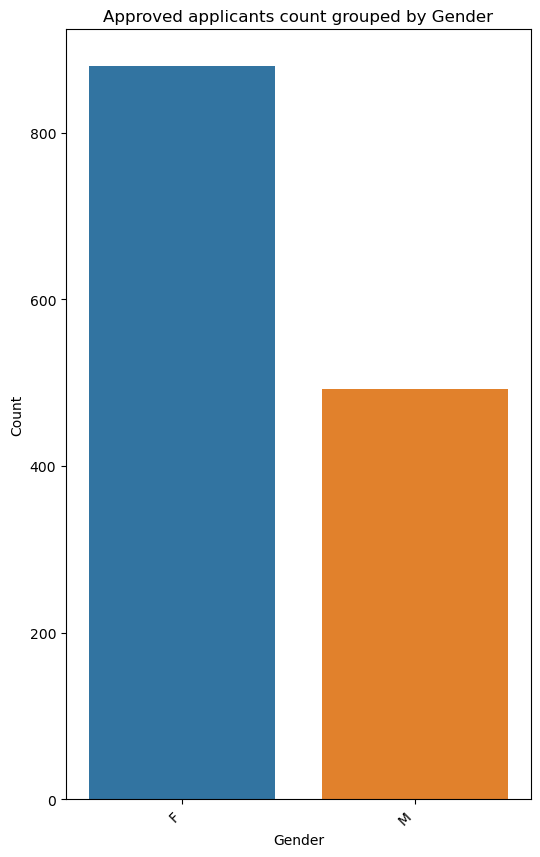

{'N': 816, 'Y': 557}


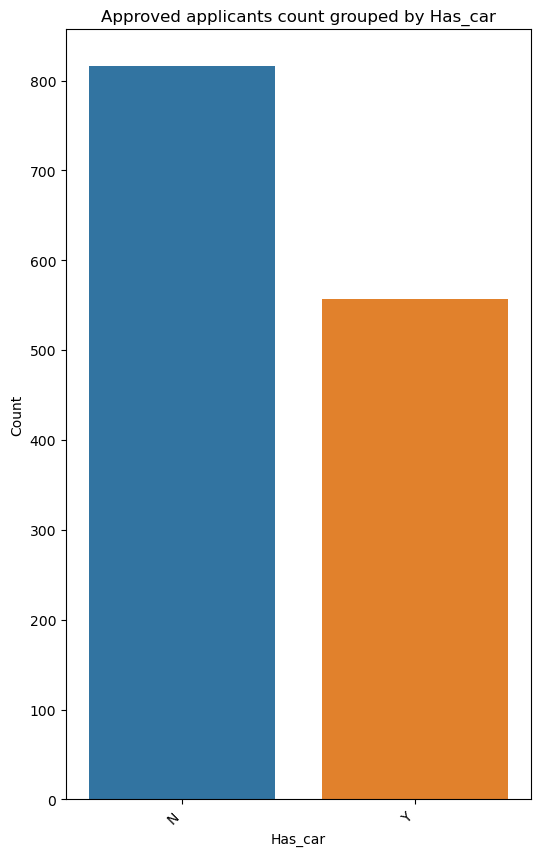

{'Y': 900, 'N': 473}


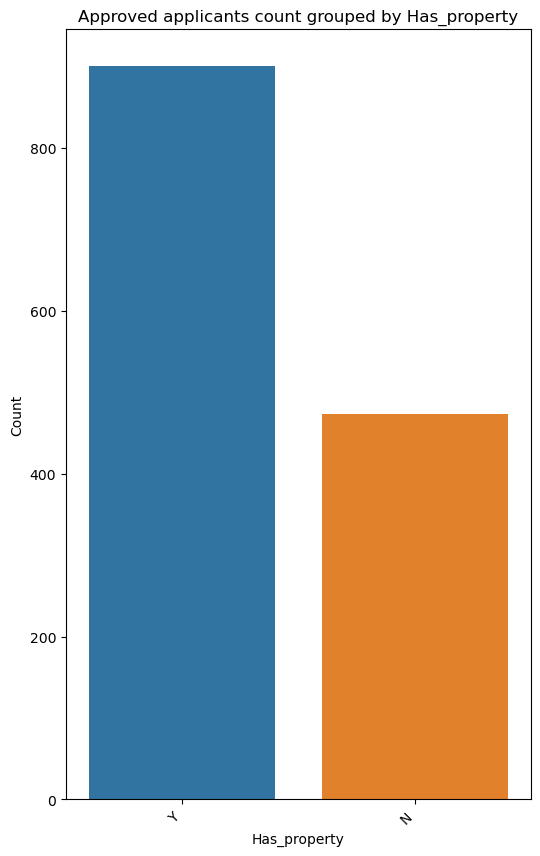

{'Working': 721, 'Commercial associate': 315, 'Pensioner': 227, 'State servant': 110}


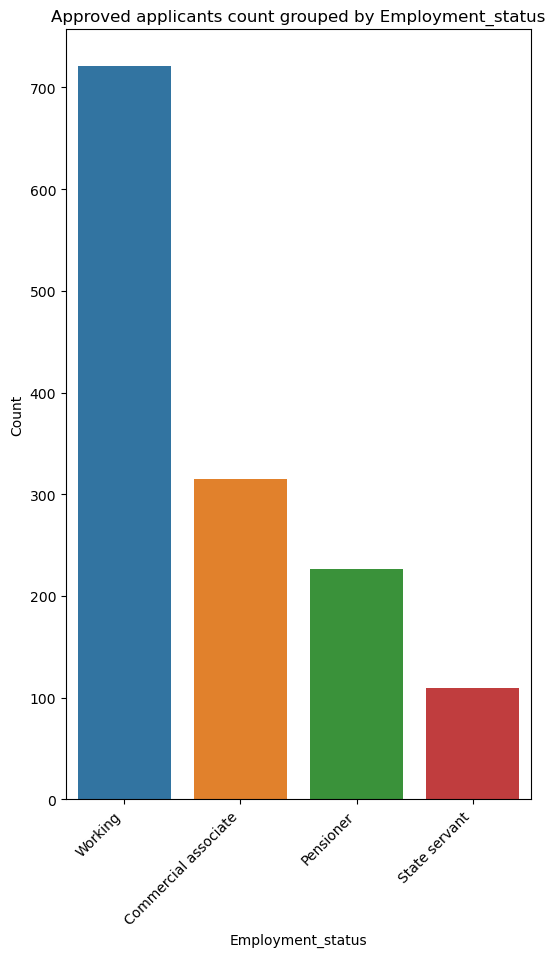

{'Secondary / secondary special': 922, 'Higher education': 371, 'Incomplete higher': 63, 'Lower secondary': 15, 'Academic degree': 2}


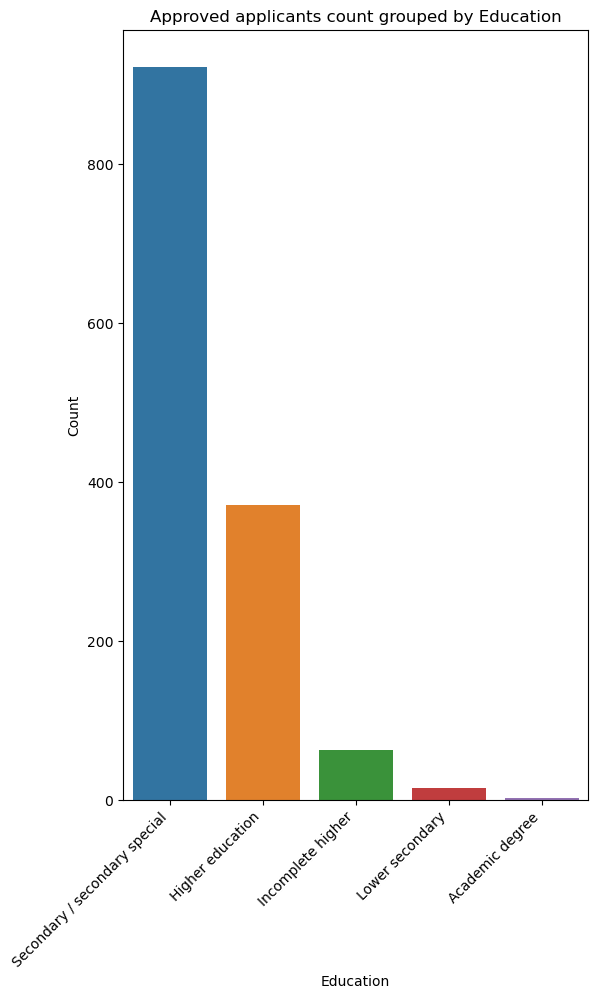

{'Married': 935, 'Single / not married': 192, 'Civil marriage': 97, 'Separated': 82, 'Widow': 67}


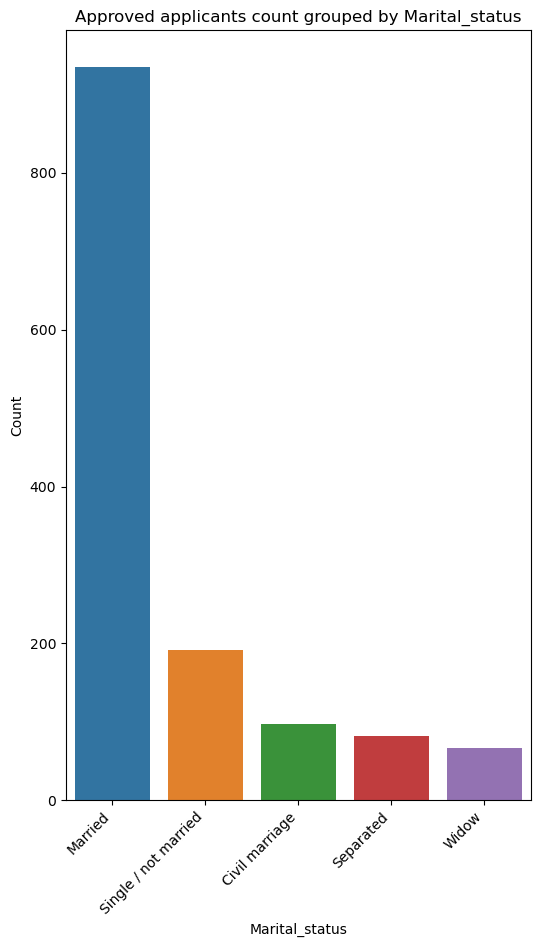

{'House / apartment': 1234, 'With parents': 75, 'Municipal apartment': 37, 'Rented apartment': 17, 'Office apartment': 7, 'Co-op apartment': 3}


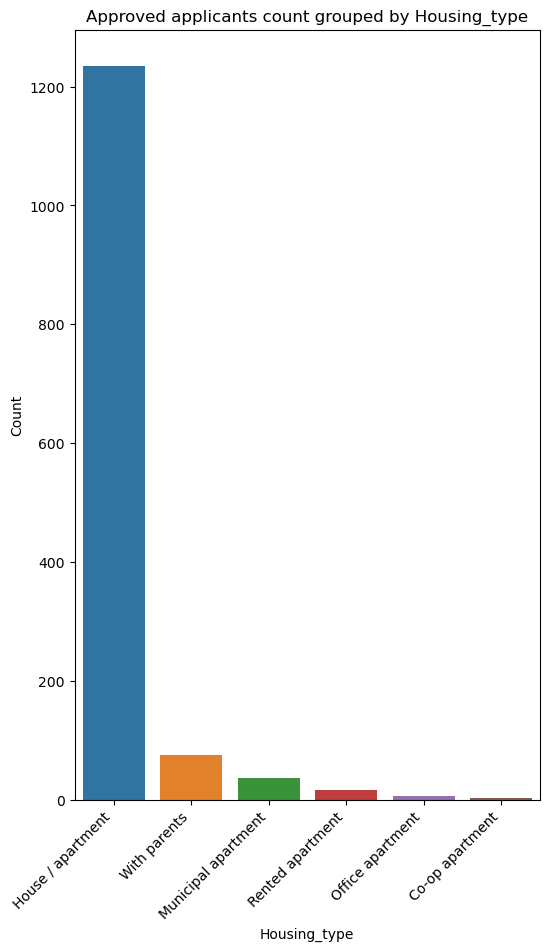

{1: 1373}


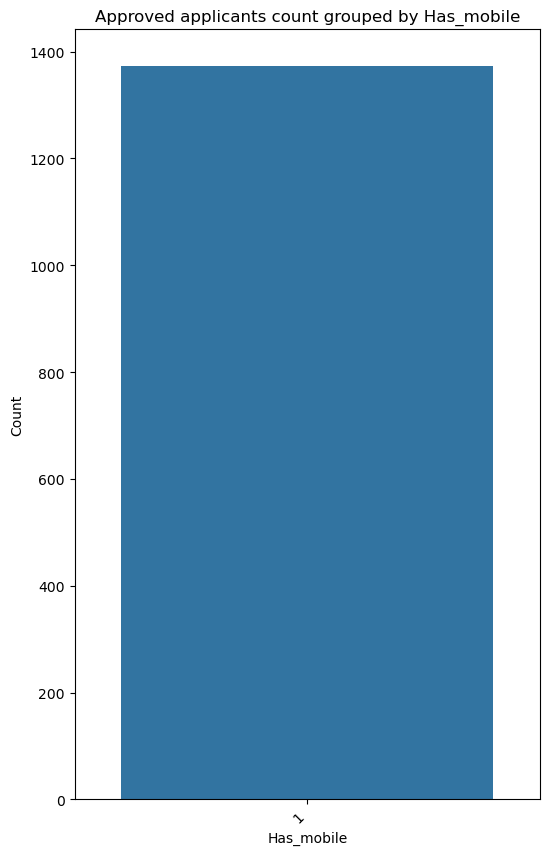

{0: 1086, 1: 287}


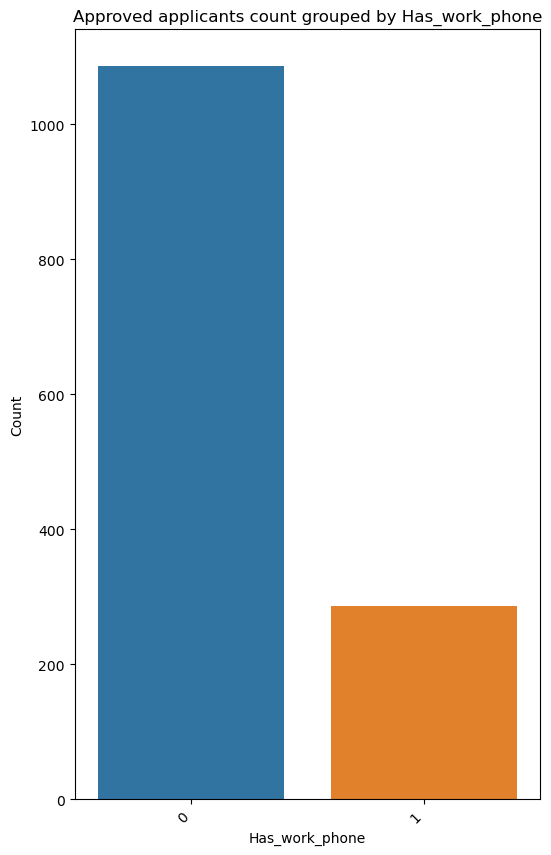

{0: 948, 1: 425}


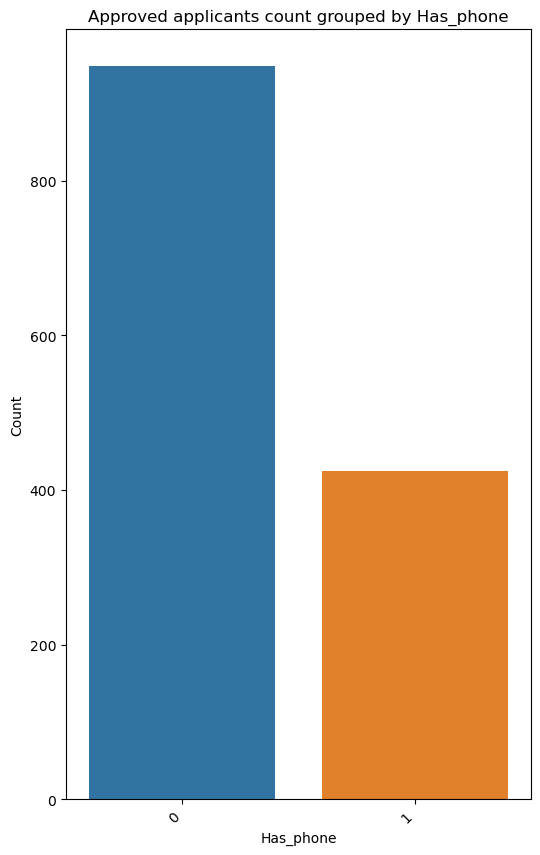

{0: 1248, 1: 125}


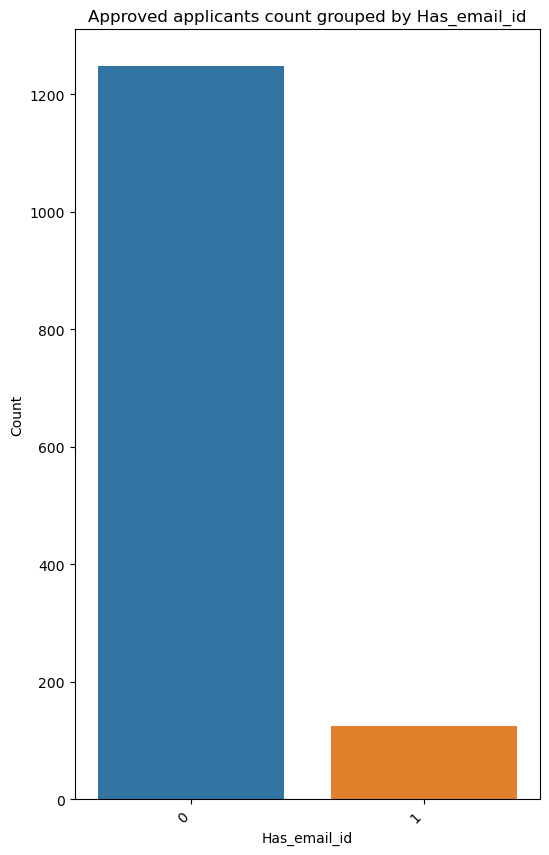

{'Laborers': 240, 'Core staff': 151, 'Managers': 122, 'Sales staff': 112, 'Drivers': 77, 'High skill tech staff': 58, 'Medicine staff': 47, 'Accountants': 39, 'Cleaning staff': 20, 'Cooking staff': 17, 'Security staff': 17, 'Private service staff': 17, 'Secretaries': 9, 'Low-skill Laborers': 7, 'Waiters/barmen staff': 4, 'HR staff': 3, 'Realty agents': 2, 'IT staff': 0}


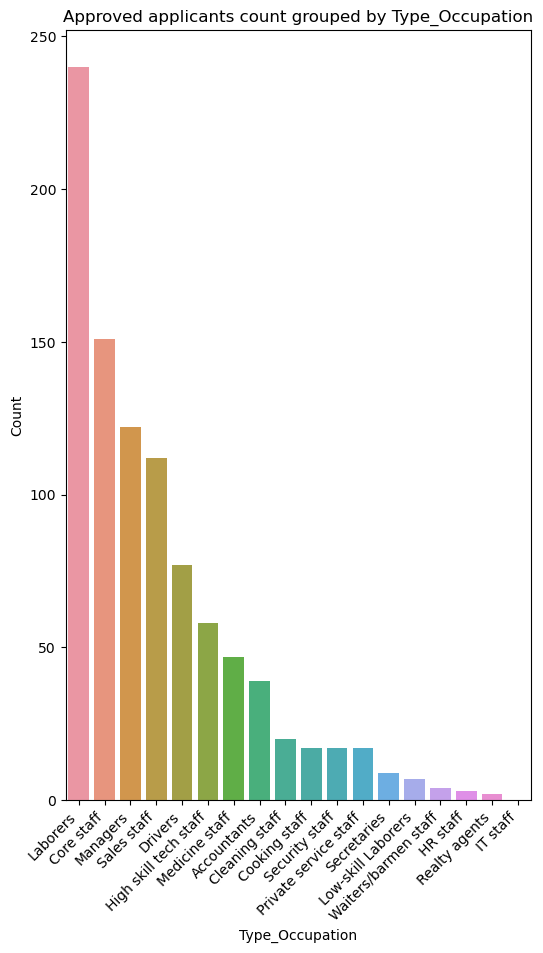

{1: 1373, 0: 0}


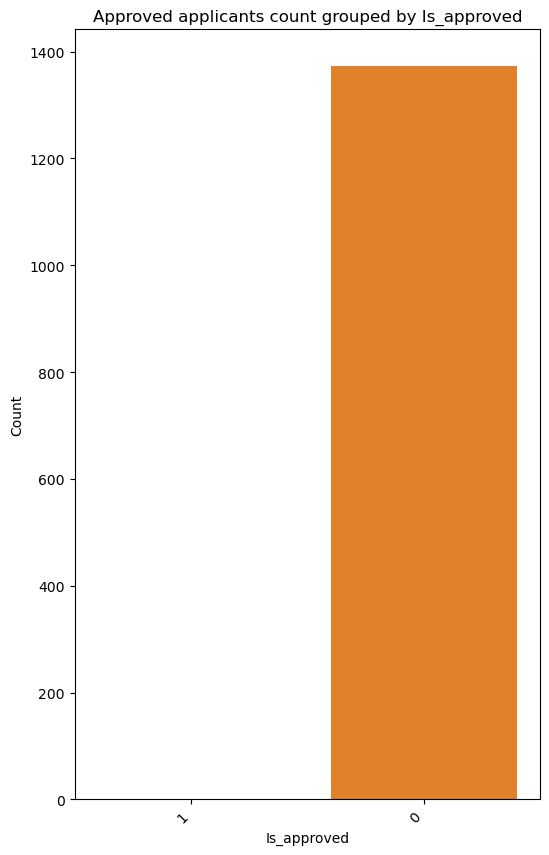

In [473]:
for cat in catvar:
    bar_plot_target(data, cat)

Gender vs target variable Is_approved: Females are approved more than Males for credit card

Has_car vs target variable Is_approved : Has_car has no impact on target variable as count of approved applicants who doesn't                                            own a car is more.

Has_property vs target variable Is_approved: Count of approved applicants who owns a property is more compared to who doesn't                                                own.

Employment_status vs target variable Is_approved: Employment_status as Working has more approved applicants compared to other                                                     employment status.

Education vs target variable Is_approved: Most of the approved applicants are who completed their Secondary / secondary special.

Marital_status vs target variable Is_approved: Married people are approved more compared to other marital status.

Housing_type vs target variable Is_approved : Most of the approved applicants are living in House/apartment.

Type_Occupation vs target variable Is_approved: Applicants who are Laborrs are approved more compared to other occupations.

* Has_mobile feature doesn't have any impact on target feature as all the applicants own a mobile phone.

* Has_work_phone, Has_phone, Has_email_id features have no impact on target feature as applicants who doesn't have work phone/phone/email id are approved more.



Is_approved
0    198720.000000
1    190049.142389
Name: Annual_income, dtype: float64


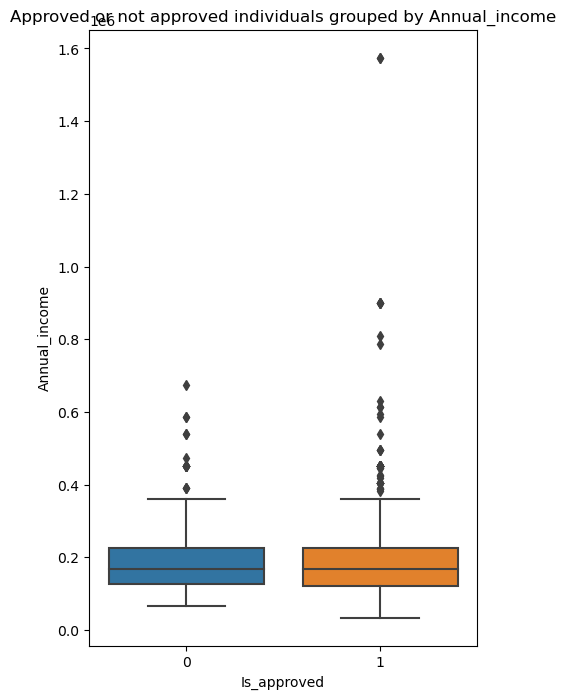

Is_approved
0    0.365714
1    0.418791
Name: Children_count, dtype: float64


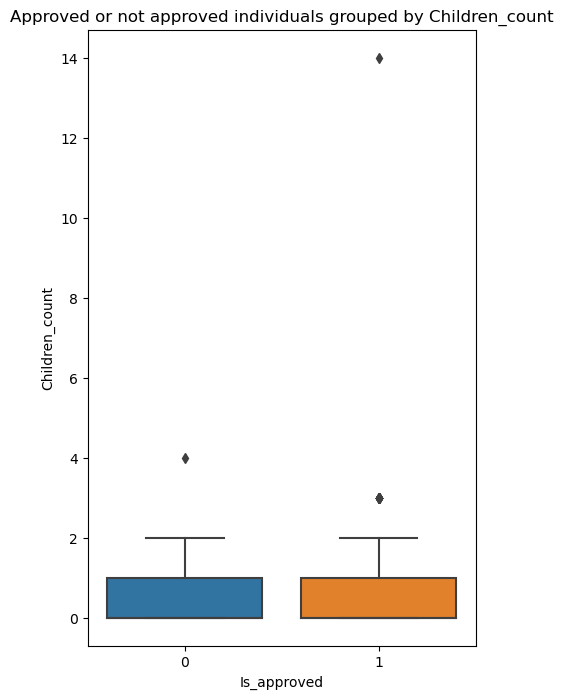

Is_approved
0    2.080000
1    2.171886
Name: Family_Members, dtype: float64


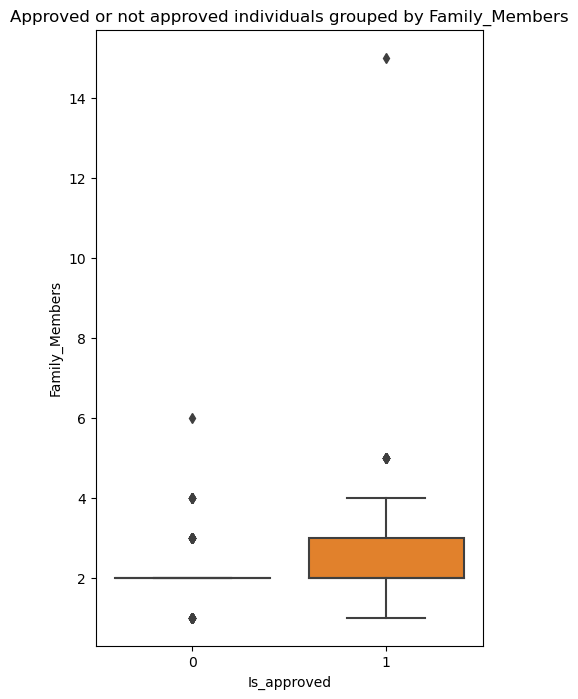

Is_approved
0    44.856229
1    43.236271
Name: Age, dtype: float64


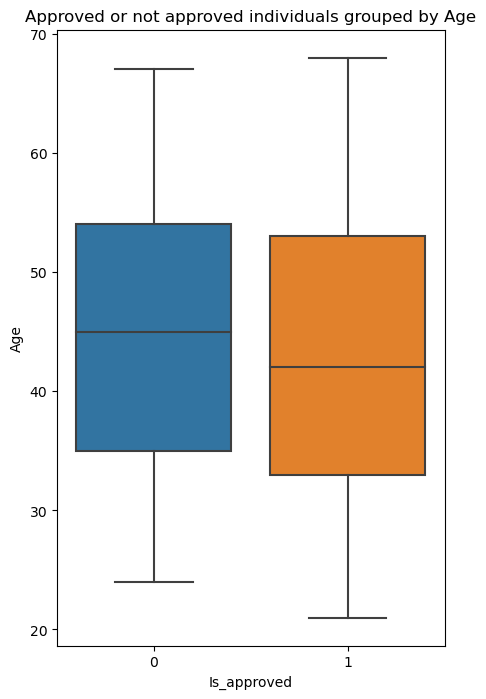

Is_approved
0    3.845714
1    5.896577
Name: Employed_years, dtype: float64


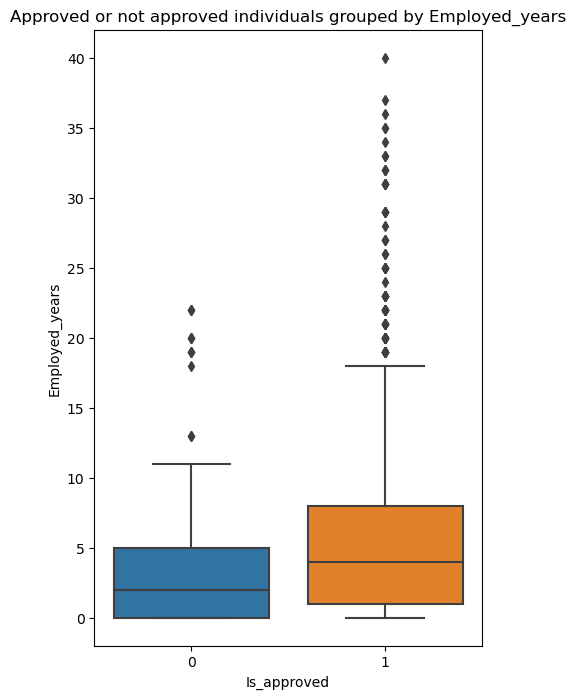

In [474]:
for num in numvar:
    box_plot_target(data, num)

* Employed_years vs Target variable Is_approved: Applicants who have more employed years are approved more.

* Annual_income vs Is_approved: Annual_income doesnt have any impact on target feature as the average of each class of target feature is more or less same.

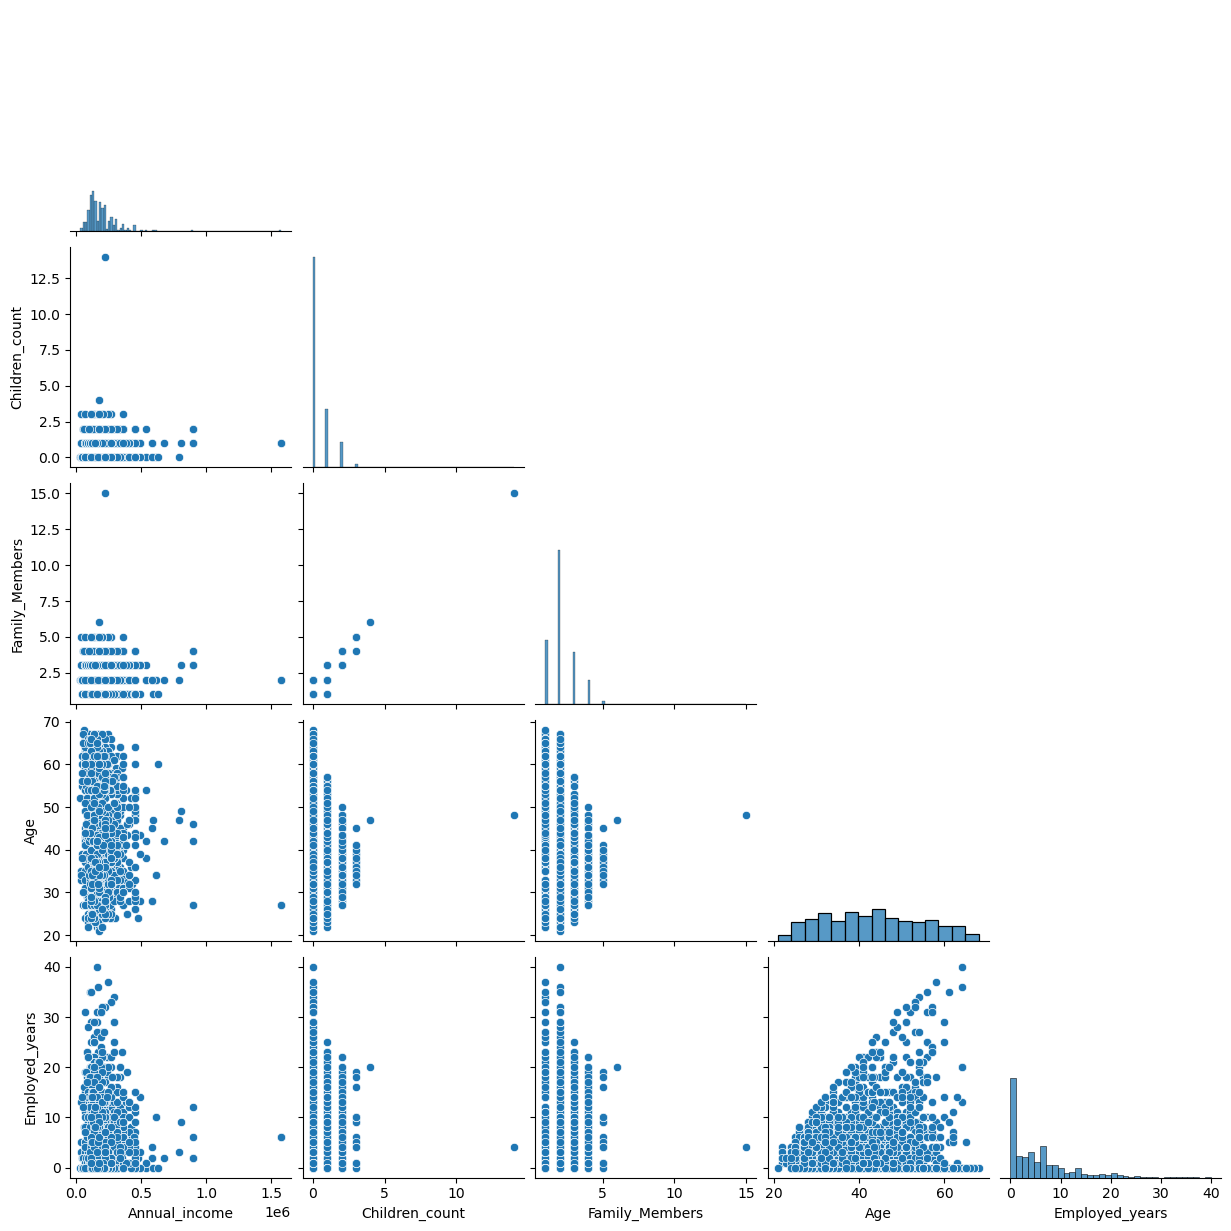

In [475]:
sns.pairplot(data[numvar], corner=True)
plt.show()

From the pairplot we can see that Family_Members and Children_count are highly correlated. Also applicants who are older have more employed years.

<AxesSubplot:>

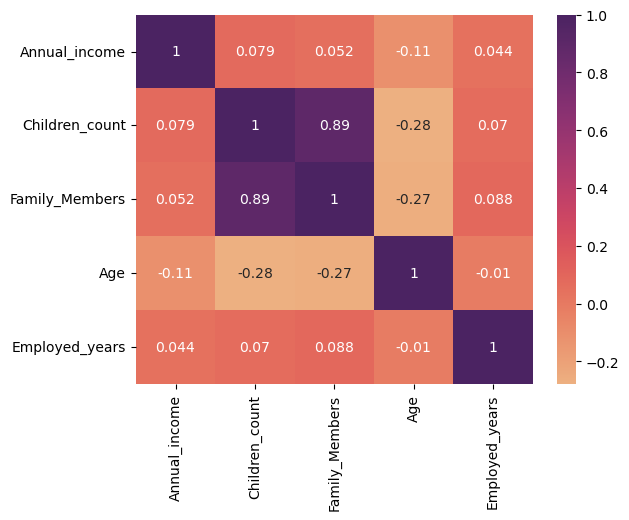

In [476]:
sns.heatmap(data[numvar].corr(), annot=True, cmap='flare')

In [477]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ind_ID             1548 non-null   int64  
 1   Gender             1548 non-null   object 
 2   Has_car            1548 non-null   object 
 3   Has_property       1548 non-null   object 
 4   Children_count     1548 non-null   int64  
 5   Annual_income      1548 non-null   float64
 6   Employment_status  1548 non-null   object 
 7   Education          1548 non-null   object 
 8   Marital_status     1548 non-null   object 
 9   Housing_type       1548 non-null   object 
 10  Has_mobile         1548 non-null   int64  
 11  Has_work_phone     1548 non-null   int64  
 12  Has_phone          1548 non-null   int64  
 13  Has_email_id       1548 non-null   int64  
 14  Type_Occupation    1060 non-null   object 
 15  Family_Members     1548 non-null   int64  
 16  Is_approved        1548 

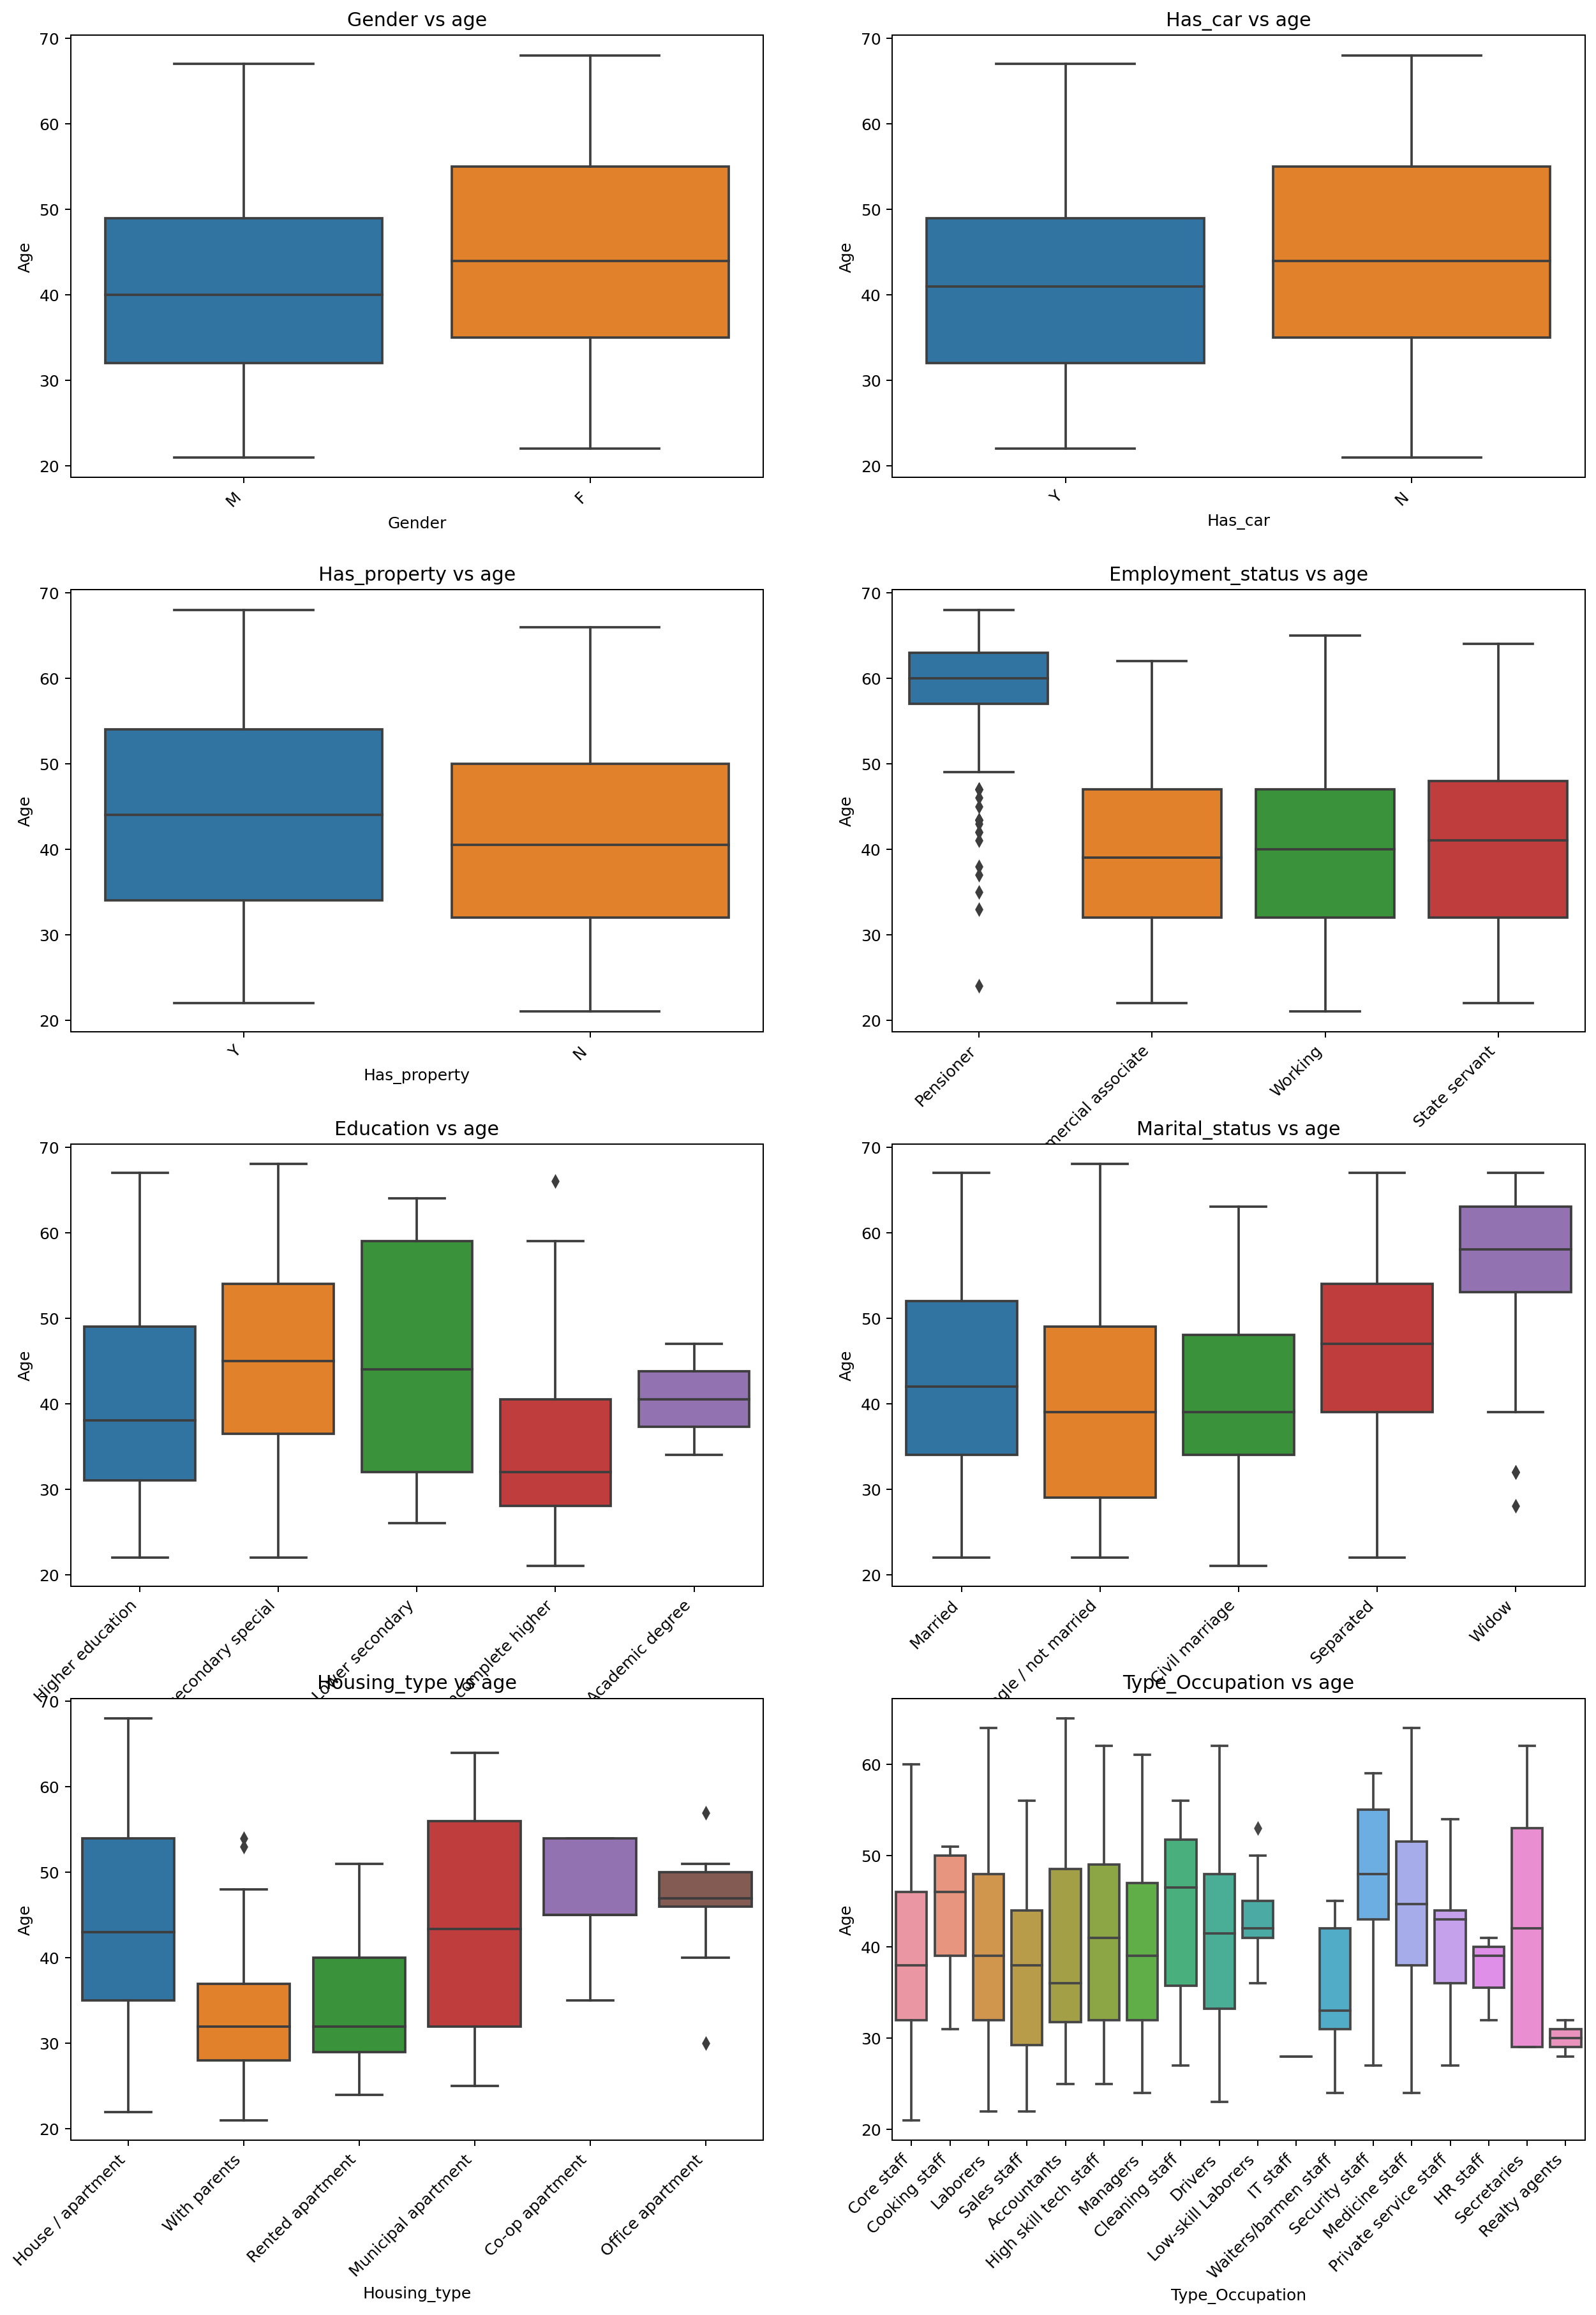

In [478]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)
cat_features = ['Gender', 'Has_car', 'Has_property', 'Employment_status', 'Education', 'Marital_status', 'Housing_type', 'Type_Occupation']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=data[cat_features[cat_ft_count]],y=data['Age'])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs age")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Age')
            cat_ft_count += 1
    break

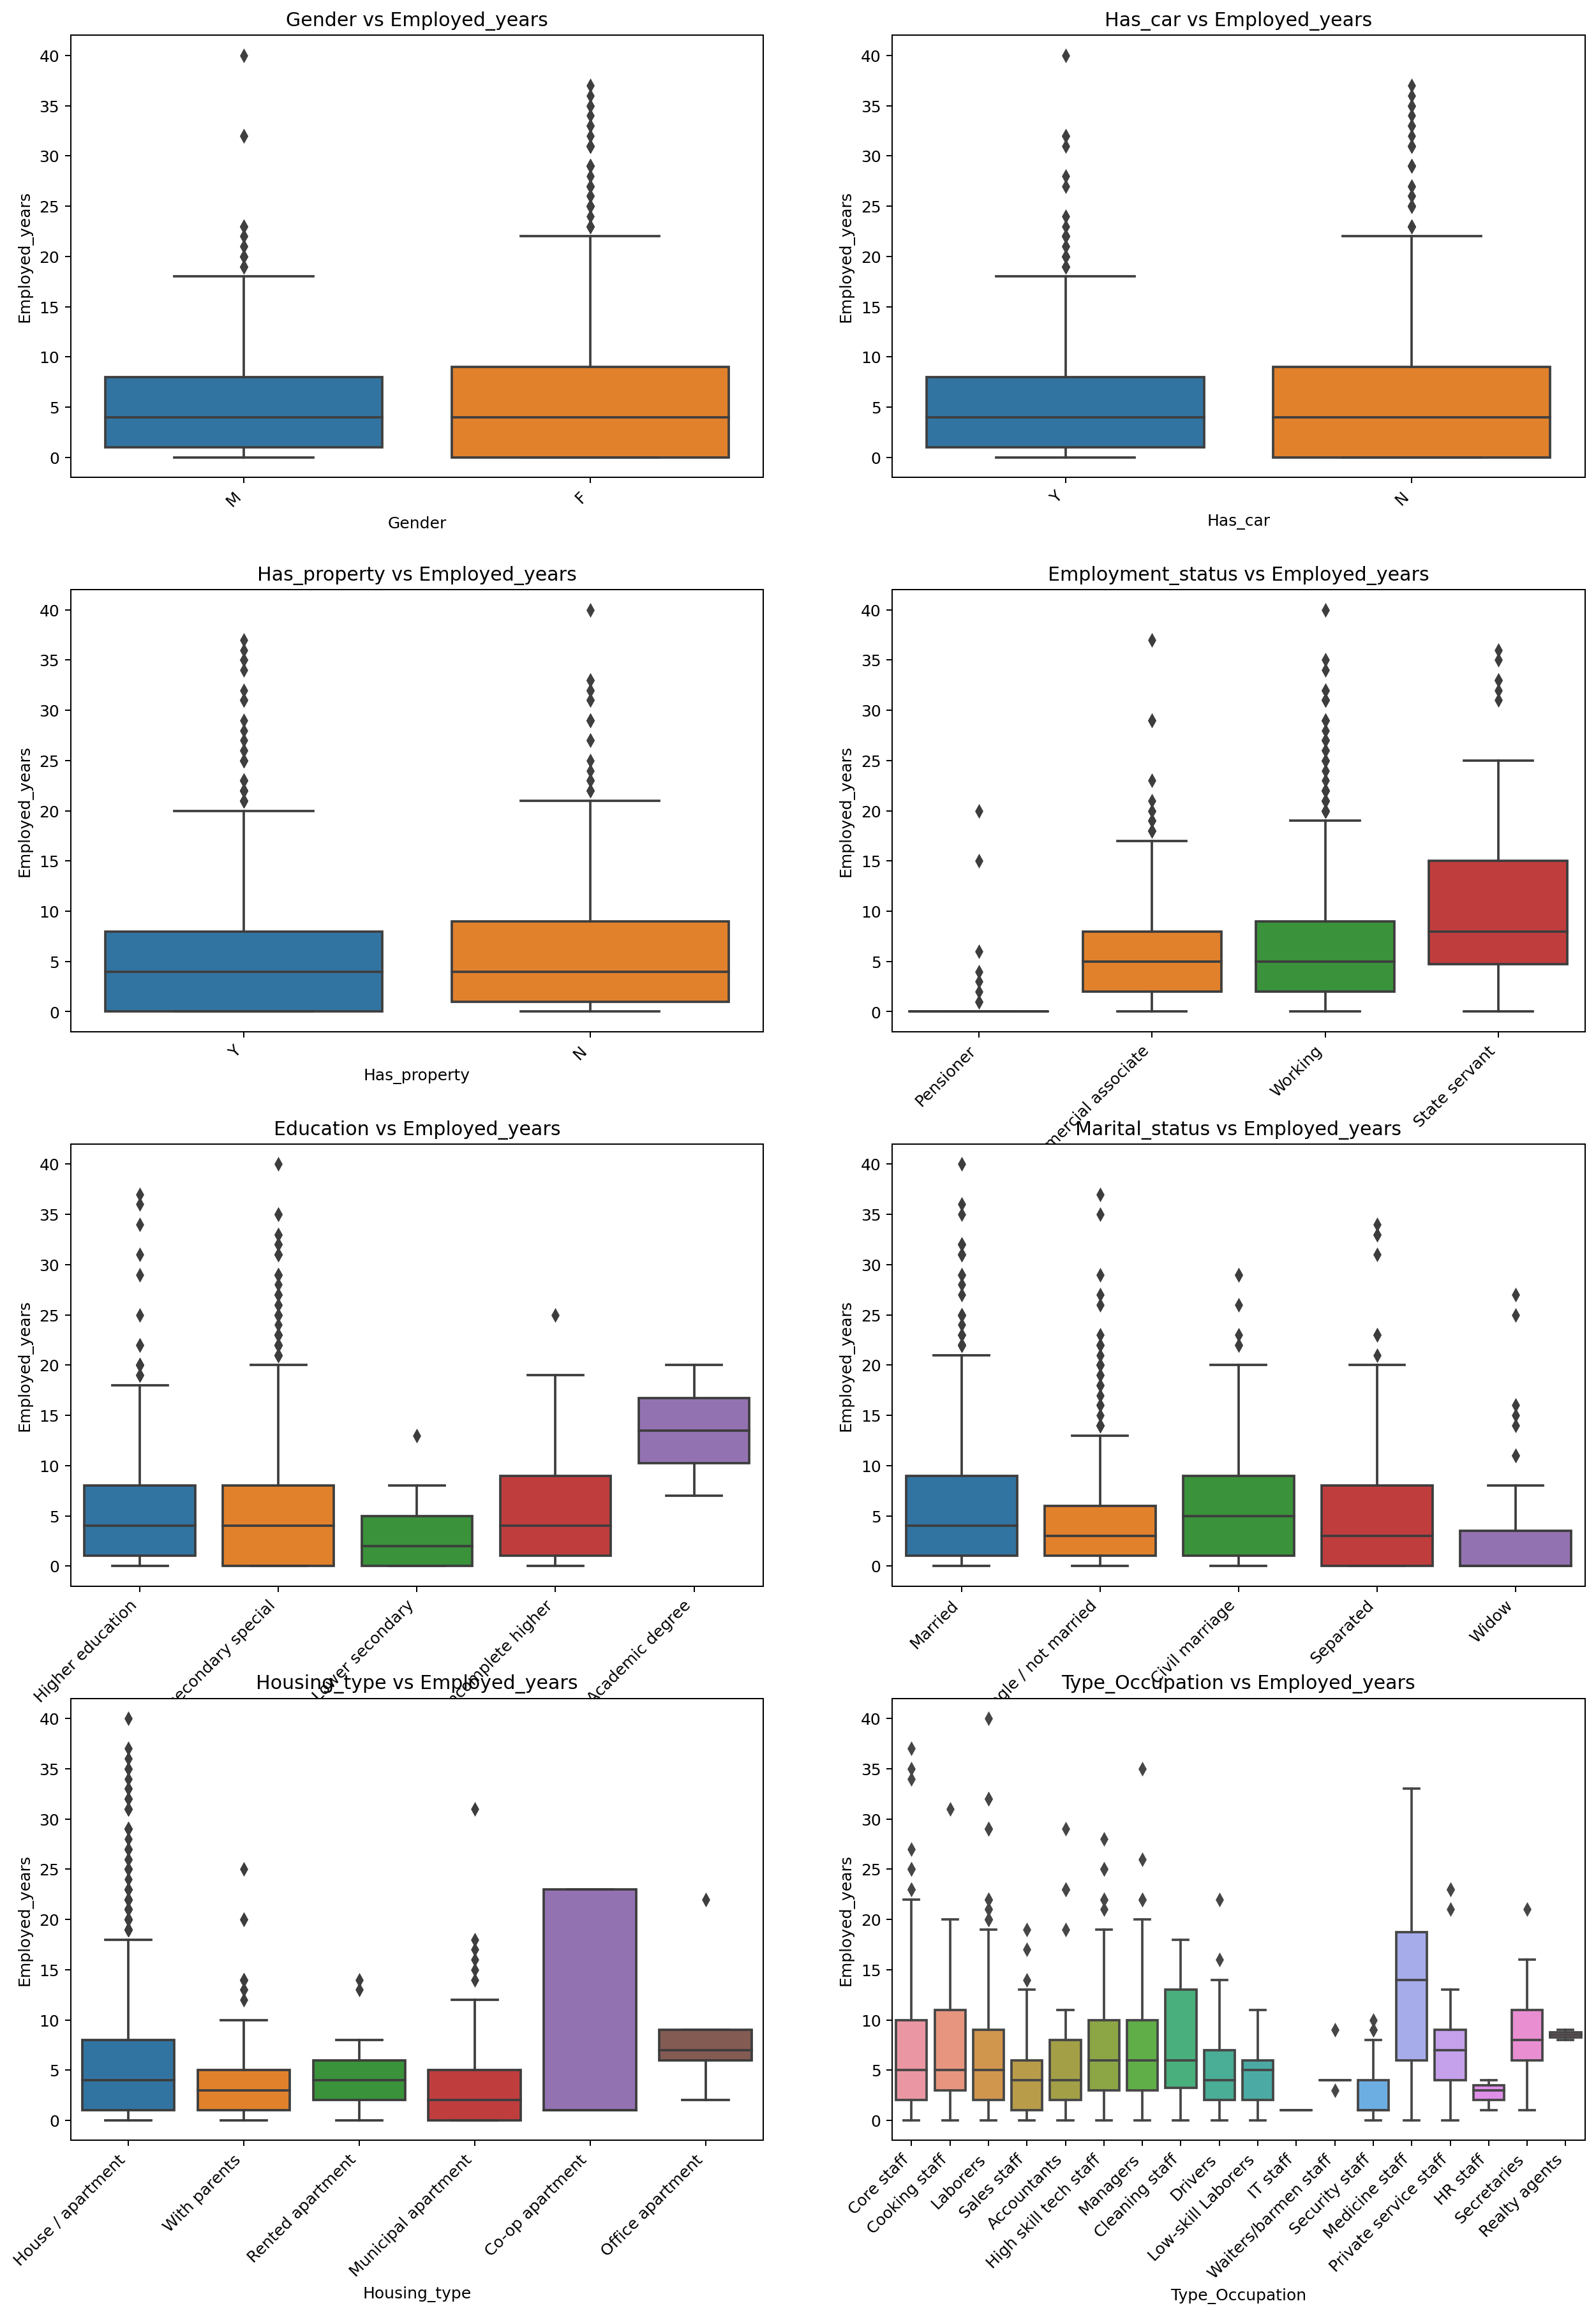

In [479]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)
cat_features = ['Gender', 'Has_car', 'Has_property', 'Employment_status', 'Education', 'Marital_status', 'Housing_type', 'Type_Occupation']
for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=data[cat_features[cat_ft_count]],y=data['Employed_years'])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Employed_years")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Employed_years')
            cat_ft_count += 1
    break

<AxesSubplot:xlabel='Type_Occupation', ylabel='count'>

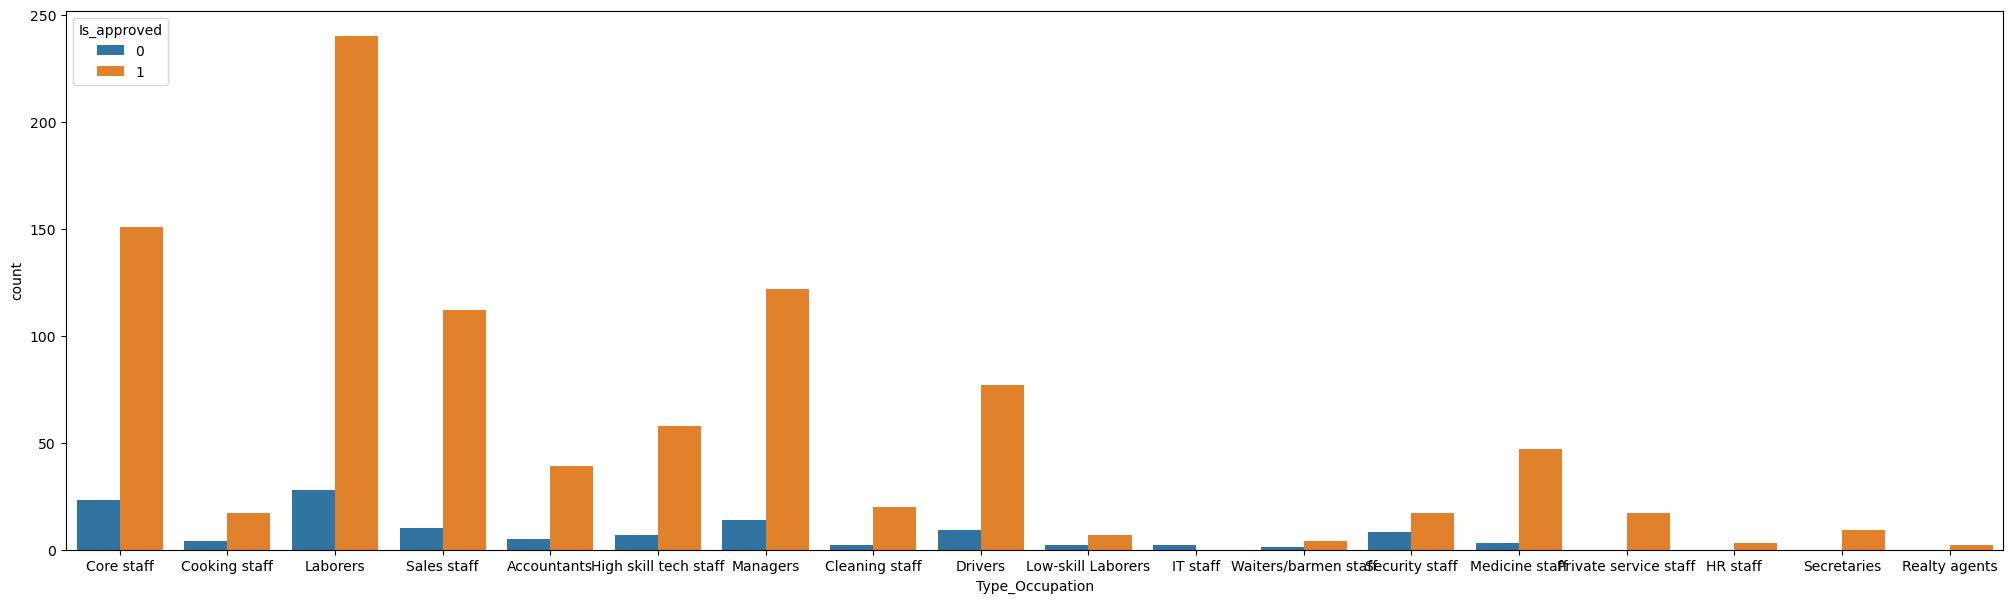

In [480]:
plt.figure(figsize=(25, 7))
sns.countplot(x=data["Type_Occupation"], hue=data["Is_approved"])

<AxesSubplot:xlabel='Education', ylabel='count'>

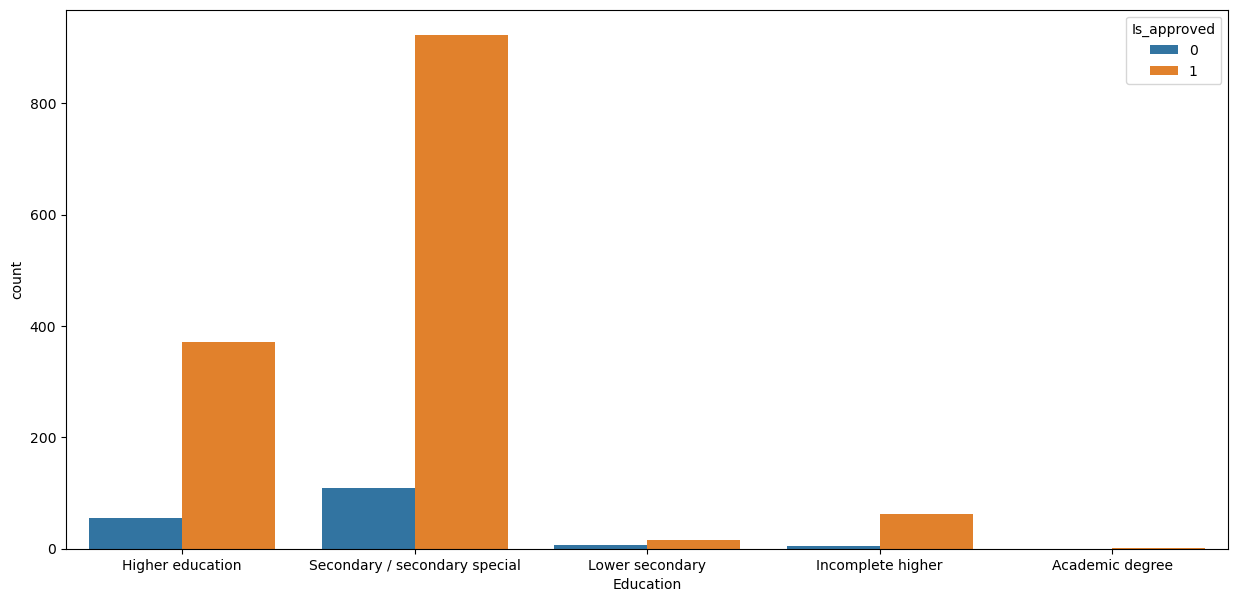

In [481]:
plt.figure(figsize=(15, 7))
sns.countplot(x=data["Education"], hue=data["Is_approved"])

<AxesSubplot:xlabel='Family_Members', ylabel='count'>

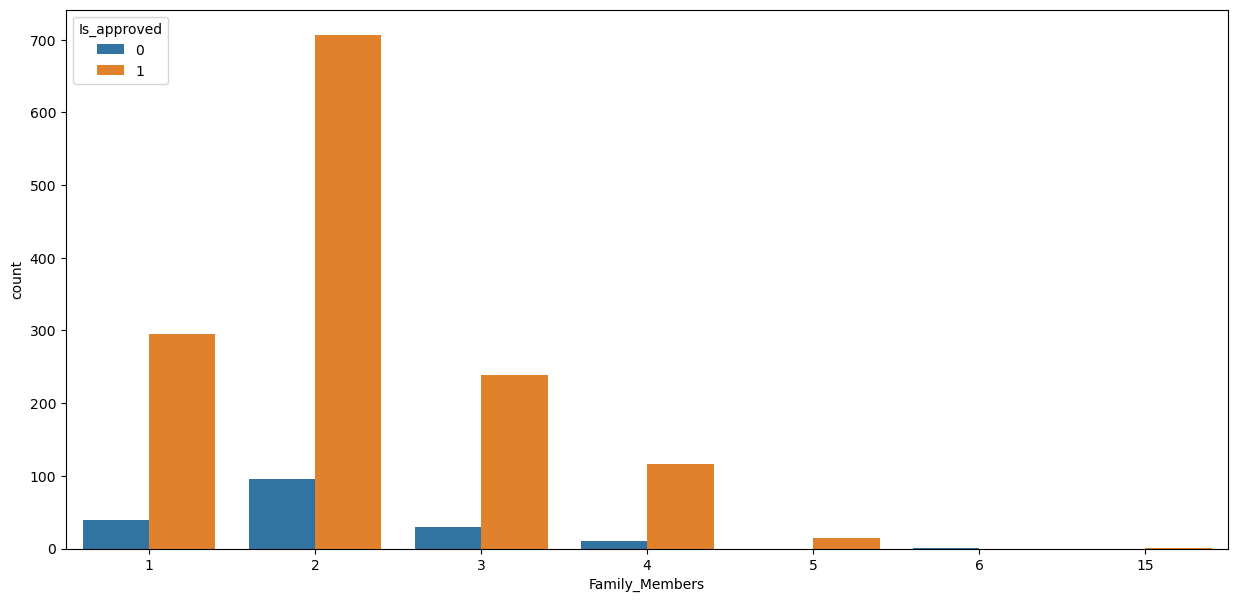

In [482]:
plt.figure(figsize=(15, 7))
sns.countplot(x=data["Family_Members"], hue=data["Is_approved"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

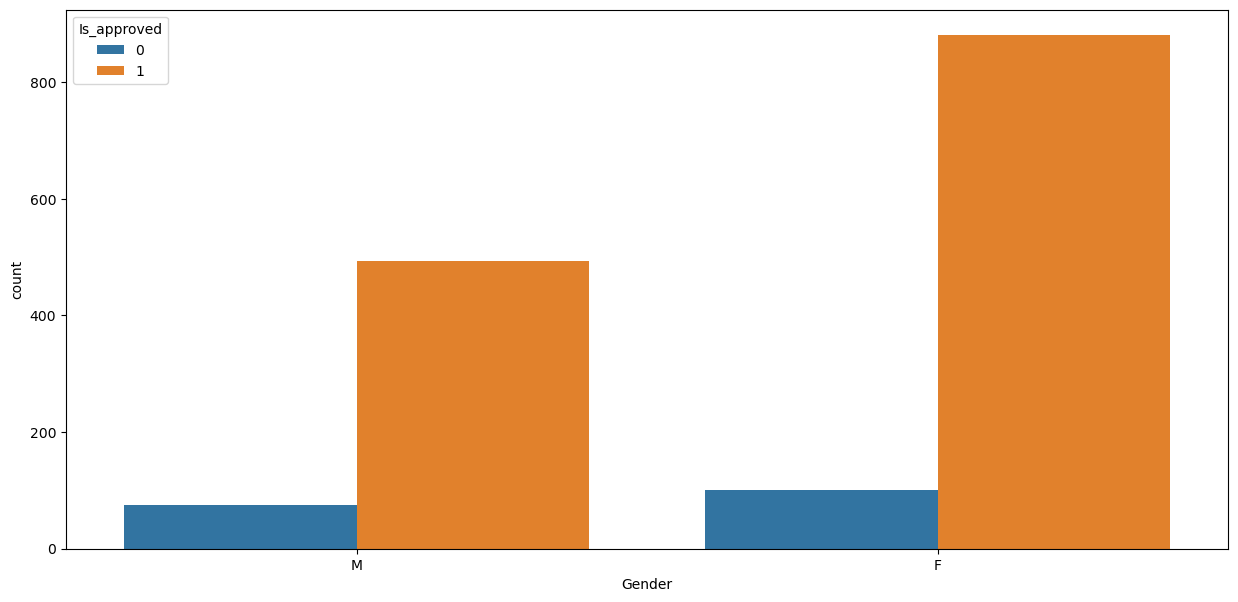

In [483]:
plt.figure(figsize=(15, 7))
sns.countplot(x=data["Gender"], hue=data["Is_approved"])

After the Univariate Analysis, Bivariate Analysis, Pairplot, correlation, countplots with respect to target variable, we have come to following conclusions:
* Overall an approved applicant is a married female with an average age of 43 years and no children. They own a property and       live in House/apartment. They have completed Secondary education with an average annual income of 190049. They are employed     for more than 5 years.
* Annual_income and Age have no impact on target variable Is_approved.
* Applicants with more employed years are approved than with lesser years.


Section 3: Data analysis approach

What approach are you going to take in order to prove or disprove your hypothesis?

* Conduct univariate analysis, bivariate analysis, T-test, Anova, correlation  to prove or disprove the hypothesis.

What feature engineering techniques will be relevant to your project?

* Handling missing values
* Encoding nominal and ordinal features using onehotencoding / ordinalencoding
* Feature scaling

Please justify your data analysis approach.
Identify important patterns in your data using the EDA approach to justify your findings.

Please refer to the text mentioned in detail after each anaylsis for various patterns and findings in data for these questions in the upper cells.

# T Test

In [484]:
# Null Hypothesis: There is no significant statistical difference between means of two age groups.
import scipy.stats as stats

approved = data[data["Is_approved"]==1]
not_approved = data[data["Is_approved"]==0]

age_group_1 = approved["Age"]
age_group_2 = not_approved["Age"]

t_statistic, p_value = stats.ttest_ind(age_group_1, age_group_2)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: -1.7561509162166895
P-value: 0.0792606303960722
Fail to reject the null hypothesis


In [485]:
# Null Hypothesis: There is no significant statistical difference between means of two age groups.
import scipy.stats as stats

approved = data[data["Is_approved"]==1]
not_approved = data[data["Is_approved"]==0]

years_group_1 = approved["Employed_years"]
years_group_2 = not_approved["Employed_years"]

t_statistic, p_value = stats.ttest_ind(years_group_1, years_group_2)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: 3.9417883091919284
P-value: 8.448684230286698e-05
Reject the null hypothesis


* Hence proved that applicants with longer Employed_years are more likely to be approved for credit card.

In [486]:
approved = data[data["Is_approved"]==1]
not_approved = data[data["Is_approved"]==0]

income_group_1 = approved["Annual_income"]
income_group_2 = not_approved["Annual_income"]

t_statistic, p_value = stats.ttest_ind(income_group_1, income_group_2)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-statistic: -0.9606540345622575
P-value: 0.3368763675425366
Fail to reject the null hypothesis


# Feature Selection

* Since Family_Members and Children_count are highly correlated, we can drop Children_count as Family_Members includes children   count.
* We can drop Ind_ID as it is not helpful in predicting whether applicant is approved or not target variable.
* Has_mobile can be dropped as everybody has mobile phone.
* Type_Occupation can be dropped as it has 31.52% of missing data and doesn't have any clear major category to impute the         missing values.

In [487]:
data.drop(columns=["Ind_ID", "Children_count", "Type_Occupation", "Has_mobile"], inplace=True)

In [488]:
data.columns

Index(['Gender', 'Has_car', 'Has_property', 'Annual_income',
       'Employment_status', 'Education', 'Marital_status', 'Housing_type',
       'Has_work_phone', 'Has_phone', 'Has_email_id', 'Family_Members',
       'Is_approved', 'Age', 'Employed_years'],
      dtype='object')

In [489]:
data.head()

,Gender,Has_car,Has_property,Annual_income,Employment_status,Education,Marital_status,Housing_type,Has_work_phone,Has_phone,Has_email_id,Family_Members,Is_approved,Age,Employed_years
0,M,Y,Y,180000.0,Pensioner,Higher education,Married,House / apartment,0,0,0,2,0,51.00,0.0
1,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,0,37.00,1.0
2,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,0,43.42,1.0
3,F,Y,N,166500.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,0,37.00,1.0
4,F,Y,N,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,0,2,0,37.00,1.0


# Handling Outliers in Family_Members, Employed_years, Annual_income features

In [490]:
Q1 = data.describe()["Family_Members"]["25%"]
Q3 = data.describe()["Family_Members"]["75%"]

In [491]:
IQR = Q3 - Q1
IQR

1.0

In [492]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [493]:
data["Family_Members"] = data["Family_Members"].clip(lower_limit, upper_limit)

In [494]:
Q1 = data.describe()["Employed_years"]["25%"]
Q3 = data.describe()["Employed_years"]["75%"]

In [495]:
IQR = Q3 - Q1
IQR

7.0

In [496]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [497]:
data["Employed_years"] = data["Employed_years"].clip(lower_limit, upper_limit)

In [498]:
Q1 = data.describe()["Annual_income"]["25%"]
Q3 = data.describe()["Annual_income"]["75%"]

In [499]:
IQR = Q3 - Q1
IQR

103500.0

In [500]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [501]:
data["Annual_income"] = data["Annual_income"].clip(lower_limit, upper_limit)

# Feature encoding of nominal and ordinal features

Nominal features: Gender, Has_car, Has_property, Employment_status, Marital_status, Housing_type

Encoding nominal features through pd.get_dummies

In [502]:
data = pd.get_dummies(data, columns = ["Gender", "Has_car", "Has_property", "Employment_status", "Marital_status", "Housing_type"], drop_first=True)
data.head()

,Annual_income,Education,Has_work_phone,Has_phone,Has_email_id,Family_Members,Is_approved,Age,Employed_years,Gender_M,...,Employment_status_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,180000.0,Higher education,0,0,0,2.0,0,51.00,0.0,1,...,0,1,0,0,0,1,0,0,0,0
1,315000.0,Higher education,1,1,0,2.0,0,37.00,1.0,0,...,0,1,0,0,0,1,0,0,0,0
2,315000.0,Higher education,1,1,0,2.0,0,43.42,1.0,0,...,0,1,0,0,0,1,0,0,0,0
3,166500.0,Higher education,1,1,0,2.0,0,37.00,1.0,0,...,0,1,0,0,0,1,0,0,0,0
4,315000.0,Higher education,1,1,0,2.0,0,37.00,1.0,0,...,0,1,0,0,0,1,0,0,0,0


In [503]:
from sklearn.preprocessing import OrdinalEncoder

#education_order = ['Academic degree', 'Higher education', 'Incomplete higher', 'Secondary / secondary special', 'Lower secondary']
oe = OrdinalEncoder()
data["Education"] = oe.fit_transform(data[["Education"]])


In [504]:
data['Education'].value_counts()

4.0    1031
1.0     426
2.0      68
3.0      21
0.0       2
Name: Education, dtype: int64

In [505]:
data.columns

Index(['Annual_income', 'Education', 'Has_work_phone', 'Has_phone',
       'Has_email_id', 'Family_Members', 'Is_approved', 'Age',
       'Employed_years', 'Gender_M', 'Has_car_Y', 'Has_property_Y',
       'Employment_status_Pensioner', 'Employment_status_State servant',
       'Employment_status_Working', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents'],
      dtype='object')

# Converting the dataset into independent and dependent variables

In [506]:
X =  data.drop(columns=["Is_approved"], axis=1)
y = data["Is_approved"]

# Splitting the data into train and test data

In [507]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [508]:
#Normalization scaling all the features between 0 and 1

from sklearn.preprocessing import  MinMaxScaler
mms =  MinMaxScaler()
X_train[["Age", "Employed_years", "Annual_income"]] = mms.fit_transform(X_train[["Age", "Employed_years", "Annual_income"]])
X_train.head()

,Annual_income,Education,Has_work_phone,Has_phone,Has_email_id,Family_Members,Age,Employed_years,Gender_M,Has_car_Y,...,Employment_status_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
1078,0.941176,1.0,1,1,0,2.0,0.297872,0.324324,0,1,...,1,1,0,0,0,1,0,0,0,0
1056,0.222222,4.0,1,1,0,2.0,0.212766,0.054054,0,1,...,0,1,0,0,0,1,0,0,0,0
1324,0.287582,3.0,0,1,0,2.0,0.489362,0.054054,0,1,...,1,1,0,0,0,1,0,0,0,0
587,1.000000,4.0,0,0,0,2.0,0.510638,0.216216,1,1,...,0,1,0,0,0,0,0,0,0,1
414,0.549020,1.0,0,0,0,3.0,0.191489,0.054054,0,1,...,0,1,0,0,0,1,0,0,0,0


In [509]:
X_test[["Age", "Employed_years", "Annual_income"]] = mms.fit_transform(X_test[["Age", "Employed_years", "Annual_income"]])
X_test.head()

,Annual_income,Education,Has_work_phone,Has_phone,Has_email_id,Family_Members,Age,Employed_years,Gender_M,Has_car_Y,...,Employment_status_Working,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
53,0.292208,4.0,0,0,0,3.0,0.088889,0.108108,1,1,...,1,1,0,0,0,1,0,0,0,0
1166,0.227273,4.0,0,0,0,4.0,0.466667,0.108108,0,0,...,1,1,0,0,0,1,0,0,0,0
1464,0.422078,4.0,0,0,0,2.0,0.822222,0.000000,0,0,...,0,1,0,0,0,1,0,0,0,0
66,0.188312,1.0,0,0,0,1.0,1.000000,0.000000,1,0,...,0,0,1,0,0,1,0,0,0,0
191,0.422078,4.0,0,0,0,1.0,0.400000,0.054054,0,0,...,0,0,0,1,0,1,0,0,0,0


Section 4: Machine learning approach

1.What method will you use for machine learning based predictions for credit card approval?
Following methods will be used for ML based predictions for credit card approval.
* Logistic Regression
* Decision Tree
* Random Forest
* KNN
* XGBoost
* SVC





# Model Training

In [510]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression()
log_r.fit(X_train, y_train)

LogisticRegression()

In [511]:
y_pred = log_r.predict(X_test)

In [512]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [513]:
# Model Evaluation
y_pred1 = dt.predict(X_test)

In [514]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [515]:
y_pred2 = rf.predict(X_test)

In [516]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [517]:
y_pred3 = knn.predict(X_test)

C:\Users\Anandappan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [518]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [519]:
y_pred4 = xgb.predict(X_test)

In [520]:
# Support Vector Machine
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [521]:
y_pred5 = svc.predict(X_test)

3. Please perform necessary steps required to improve the accuracy of your model.
* Please check below

In [522]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

print("----------Logistic Regression----------------")
print("Confusion Matrix:", confusion_matrix(y_test,y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred)) 
print("Precision Score:", precision_score(y_test,y_pred)) 
print("Recall_Score:", recall_score(y_test,y_pred)) 
print("f1 Score:", f1_score(y_test,y_pred)) 
print("*" * 100)

----------Logistic Regression----------------
Confusion Matrix: [[  0  35]
 [  0 275]]
Accuracy Score: 0.8870967741935484
Precision Score: 0.8870967741935484
Recall_Score: 1.0
f1 Score: 0.9401709401709402
****************************************************************************************************


In [523]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

grid_search = GridSearchCV(log_r, param_grid, cv=5, scoring='precision')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

y_pred_afhp = grid_search.predict(X_test)
precision_score(y_test, y_pred_afhp)

C:\Users\Anandappan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Anandappan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Anandappan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Anandappan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Anandappan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Anandappan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: Con

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


C:\Users\Anandappan\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8870967741935484

In [524]:
print("----------Decision Tree----------------")
print("Confusion Matrix:", confusion_matrix(y_test,y_pred1))
print("Accuracy Score:", accuracy_score(y_test,y_pred1)) 
print("Precision Score:", precision_score(y_test,y_pred1)) 
print("Recall_Score:", recall_score(y_test,y_pred1)) 
print("f1 Score:", f1_score(y_test,y_pred1)) 
print("*" * 100)

----------Decision Tree----------------
Confusion Matrix: [[ 19  16]
 [ 34 241]]
Accuracy Score: 0.8387096774193549
Precision Score: 0.9377431906614786
Recall_Score: 0.8763636363636363
f1 Score: 0.9060150375939849
****************************************************************************************************


In [525]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'splitter':["best", "random"],
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}


grid_search = GridSearchCV(dt, param_grid)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

y_pred1_afhp = grid_search.predict(X_test)
precision_score(y_test, y_pred1_afhp)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


0.9142857142857143

In [526]:
print("----------Random Forest----------------")
print("Confusion Matrix:", confusion_matrix(y_test,y_pred2))
print("Accuracy Score:", accuracy_score(y_test,y_pred2)) 
print("Precision Score:", precision_score(y_test,y_pred2)) 
print("Recall_Score:", recall_score(y_test,y_pred2)) 
print("f1 Score:", f1_score(y_test,y_pred2)) 
print("*" * 100)

----------Random Forest----------------
Confusion Matrix: [[ 13  22]
 [  2 273]]
Accuracy Score: 0.9225806451612903
Precision Score: 0.9254237288135593
Recall_Score: 0.9927272727272727
f1 Score: 0.9578947368421052
****************************************************************************************************


In [527]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_features': [2, 3, 4],
    'bootstrap': [True, False]  # Whether to bootstrap samples
}
grid_search = GridSearchCV(rf, param_grid)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

y_pred2_afhp = grid_search.predict(X_test)
precision_score(y_test, y_pred2_afhp)

Best Hyperparameters: {'bootstrap': False, 'max_features': 3, 'n_estimators': 100}


0.9254237288135593

In [528]:
print("----------KNN----------------")
print("Confusion Matrix:", confusion_matrix(y_test,y_pred3))
print("Accuracy Score:", accuracy_score(y_test,y_pred3)) 
print("Precision Score:", precision_score(y_test,y_pred3)) 
print("Recall_Score:", recall_score(y_test,y_pred3)) 
print("f1 Score:", f1_score(y_test,y_pred3)) 
print("*" * 100)

----------KNN----------------
Confusion Matrix: [[  6  29]
 [  6 269]]
Accuracy Score: 0.8870967741935484
Precision Score: 0.9026845637583892
Recall_Score: 0.9781818181818182
f1 Score: 0.9389179755671903
****************************************************************************************************


In [529]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ["auto", "kd_tree"]
}
grid_search = GridSearchCV(knn, param_grid, cv=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

y_pred3_afhp = grid_search.predict(X_test)
precision_score(y_test, y_pred3_afhp)

C:\Users\Anandappan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anandappan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Se

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 11, 'weights': 'distance'}


0.9130434782608695

In [530]:
print("----------XGBoost----------------")
print("Confusion Matrix:", confusion_matrix(y_test,y_pred4))
print("Accuracy Score:", accuracy_score(y_test,y_pred4)) 
print("Precision Score:", precision_score(y_test,y_pred4)) 
print("Recall_Score:", recall_score(y_test,y_pred4)) 
print("f1 Score:", f1_score(y_test,y_pred4)) 
print("*" * 100)

----------XGBoost----------------
Confusion Matrix: [[ 12  23]
 [  7 268]]
Accuracy Score: 0.9032258064516129
Precision Score: 0.9209621993127147
Recall_Score: 0.9745454545454545
f1 Score: 0.9469964664310954
****************************************************************************************************


In [531]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [0.8, 1.0]  # Fraction of features used for fitting each tree
}
grid_search = GridSearchCV(xgb, param_grid, cv=3)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

y_pred4_afhp = grid_search.predict(X_test)
precision_score(y_test, y_pred4_afhp)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}


0.9033333333333333

In [532]:
print("----------Support Vector Machine----------------")
print("Confusion Matrix:", confusion_matrix(y_test,y_pred5))
print("Accuracy Score:", accuracy_score(y_test,y_pred5)) 
print("Precision Score:", precision_score(y_test,y_pred5)) 
print("Recall_Score:", recall_score(y_test,y_pred5)) 
print("f1 Score:", f1_score(y_test,y_pred5)) 
print("*" * 100)

----------Support Vector Machine----------------
Confusion Matrix: [[  0  35]
 [  0 275]]
Accuracy Score: 0.8870967741935484
Precision Score: 0.8870967741935484
Recall_Score: 1.0
f1 Score: 0.9401709401709402
****************************************************************************************************


In [533]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (if 'poly' is chosen)
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly'
}
grid_search = GridSearchCV(svc, param_grid)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

y_pred5_afhp = grid_search.predict(X_test)
precision_score(y_test, y_pred5_afhp)

Best Hyperparameters: {'C': 10, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


0.9016949152542373

In [534]:
def metrics(y_t, y_p):
    return accuracy_score(y_t,y_p), precision_score(y_t,y_p), recall_score(y_t, y_p), f1_score(y_t, y_p)

In [535]:
y_p = [y_pred, y_pred1, y_pred2, y_pred3, y_pred4, y_pred5]
s=[]
for i in range(len(y_p)):
    s.append(metrics(y_test, y_p[i]))
    i+=1
    
index = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "XGBoost", "Support Vector Machine"]    
model_metrics = pd.DataFrame(s,columns=["Accuracy Score", "Precision Score", "Recall Score", "f1 Score"], index=index)
model_metrics.reset_index(inplace=True)
model_metrics.rename(columns={"index":"Model"}, inplace=True)
model_metrics

,Model,Accuracy Score,Precision Score,Recall Score,f1 Score
0,Logistic Regression,0.887097,0.887097,1.000000,0.940171
1,Decision Tree,0.838710,0.937743,0.876364,0.906015
2,Random Forest,0.922581,0.925424,0.992727,0.957895
3,KNN,0.887097,0.902685,0.978182,0.938918
4,XGBoost,0.903226,0.920962,0.974545,0.946996
5,Support Vector Machine,0.887097,0.887097,1.000000,0.940171


# After hyper parameter tuning:

In [536]:
y_p_new = [y_pred_afhp, y_pred1_afhp, y_pred2_afhp, y_pred3_afhp, y_pred4_afhp, y_pred5_afhp]
t=[]
for i in range(len(y_p_new)):
    t.append(metrics(y_test, y_p_new[i]))
    i+=1
    
index = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "XGBoost", "Support Vector Machine"]    
model_metrics_afhp = pd.DataFrame(t,columns=["Accuracy Score", "Precision Score", "Recall Score", "f1 Score"], index=index)
model_metrics_afhp.reset_index(inplace=True)
model_metrics_afhp.rename(columns={"index":"Model"}, inplace=True)
model_metrics_afhp

,Model,Accuracy Score,Precision Score,Recall Score,f1 Score
0,Logistic Regression,0.887097,0.887097,1.000000,0.940171
1,Decision Tree,0.861290,0.914286,0.930909,0.922523
2,Random Forest,0.922581,0.925424,0.992727,0.957895
3,KNN,0.909677,0.913043,0.992727,0.951220
4,XGBoost,0.893548,0.903333,0.985455,0.942609
5,Support Vector Machine,0.877419,0.901695,0.967273,0.933333


In [537]:
data["Is_approved"].value_counts()

1    1373
0     175
Name: Is_approved, dtype: int64

Since the data is imbalanced, we cannot rely on accuracy_score metric.
As the goal of the project is to reduce the credit default, Precision score would be ideal to minimize credit default as there will be fewer false positives.
According to the business context and economic situaton, if the cost of approving a risky applicant(false positive) is high, we can go for Precision Score.
If missing a creditworthy applicant (false negative) is costly, we can go for Recall Score.

In this project, I am considering Precision score, based on current economic situation.

4. Please compare all models (at least 4  models).

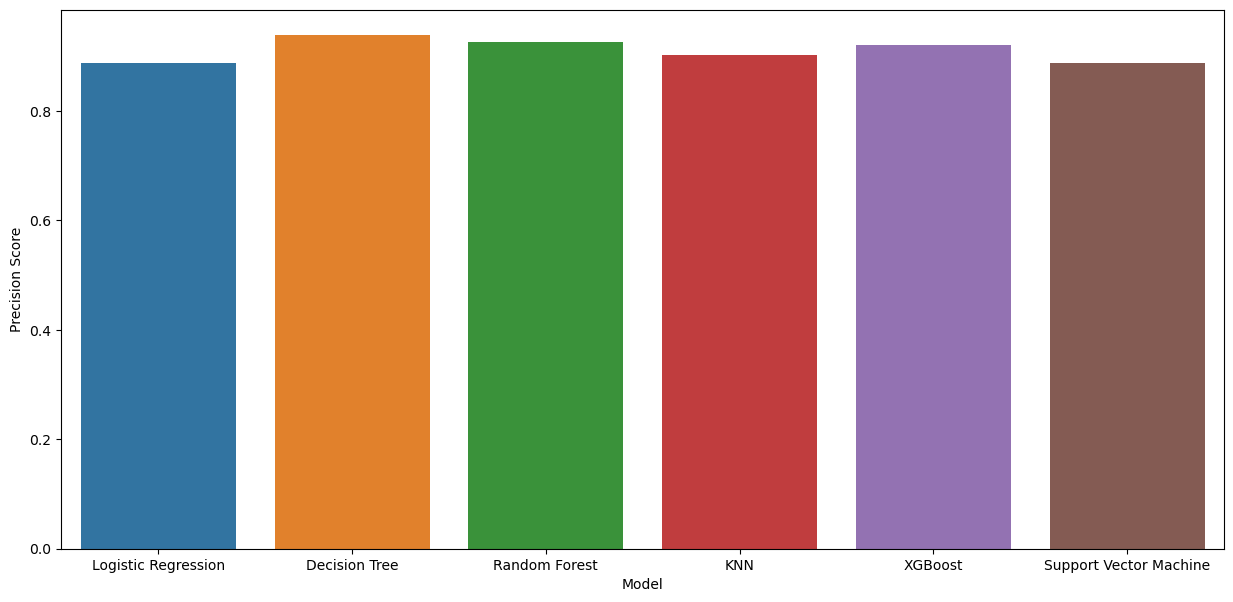

In [538]:
plt.figure(figsize=(15, 7))
sns.barplot(x=model_metrics["Model"], y = model_metrics["Precision Score"])
plt.show()

2. Please justify the most appropriate model.

* From the bar plot of different ML models, it is evident that Decision Tree Model is in top followed by Random Forest and         XGBoost.

# Precision Score after Hyper parameter tuning 

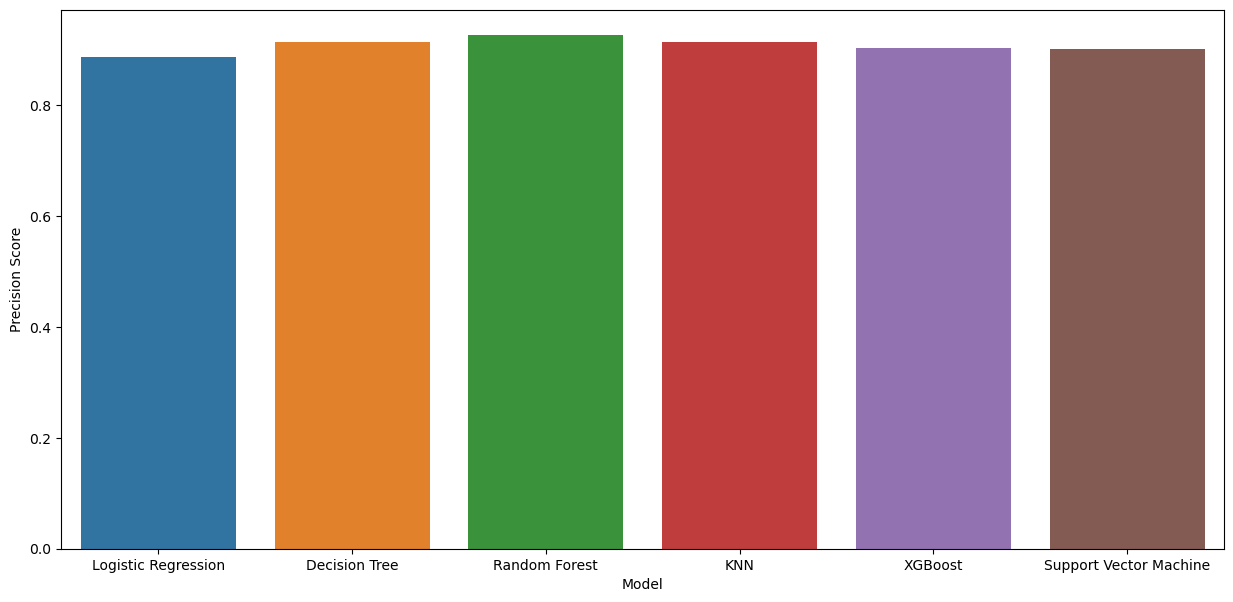

In [539]:
plt.figure(figsize=(15, 7))
sns.barplot(x=model_metrics_afhp["Model"], y = model_metrics_afhp["Precision Score"])
plt.show()

After hyper parameter tuning, Randorm Forest is giving us the best precision score followed by Decision Tree and KNN Models.